<a href="https://colab.research.google.com/github/Shashwat-23/NYC_taxi-trip-duration-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   -***NYC Taxi Trip Time Prediction Regression***


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Shashwat Kulkarni**

# **Project Summary -**

**A taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. So, the topic for the supervised machine learning capstone project is NYC taxi-trip time prediction in this project our target variable is trip time prediction so our goal to predict when the cab will be free for the next trip.**


**The initial step in our project is to prepare the dataset for our machine learning models. Upon loading the dataset,  I started on Data Cleaning, which includes checking for Nan values and duplicated values. Subsequently, then conducted an Exploratory Data Analysis where we compared our target variable, the trip duration, with other independent variables. This comparison was visualized using the seaborn and matplotlib libraries, aiding us in understanding various aspects and relationships between the target and independent variables. Further steps will include discarding unnecessary columns and performing one-hot encoding on the necessary columns.**

**After data handling and performing EDA on it we get the important feature for our machine learning model then we fit our Machine learning models like Linear regression,LightGBM the data. After applying the ML Model, we determine the key feature of the data set and perform cross-validation and hyperparameter tuning so as to find out the optimal parameter at which the error would be less for the training and testing dataset and the model performance is high and with the help of ML Evaluation metrices like R2 score, RMSE, MSE, Adjusted R2 score we decide that which machine learning model is the best fit for our dataset.
We are mostly concerned with the information of pick-up latitude and longitude and drop off latitude and longitude, to get the distance of the trip.**

**After applying various algorithm, it is found that LightGBM perform the best in predict the trip duration for a particular taxi.**



# **GitHub Link -**

https://github.com/Shashwat-23/NYC_taxi-trip-duration-prediction

# **Problem Statement**


### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [111]:
!pip install haversine

In [112]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from haversine import haversine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

warnings.filterwarnings('ignore')


### Dataset Loading

In [113]:
# Load Dataset
df=pd.read_csv('/content/NYC Taxi Data.csv')

### Dataset First View

In [114]:
# Dataset First Look
df.head(3)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124

### Dataset Rows & Columns count

In [115]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [116]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [117]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [118]:
# Missing Values/Null Values Count
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

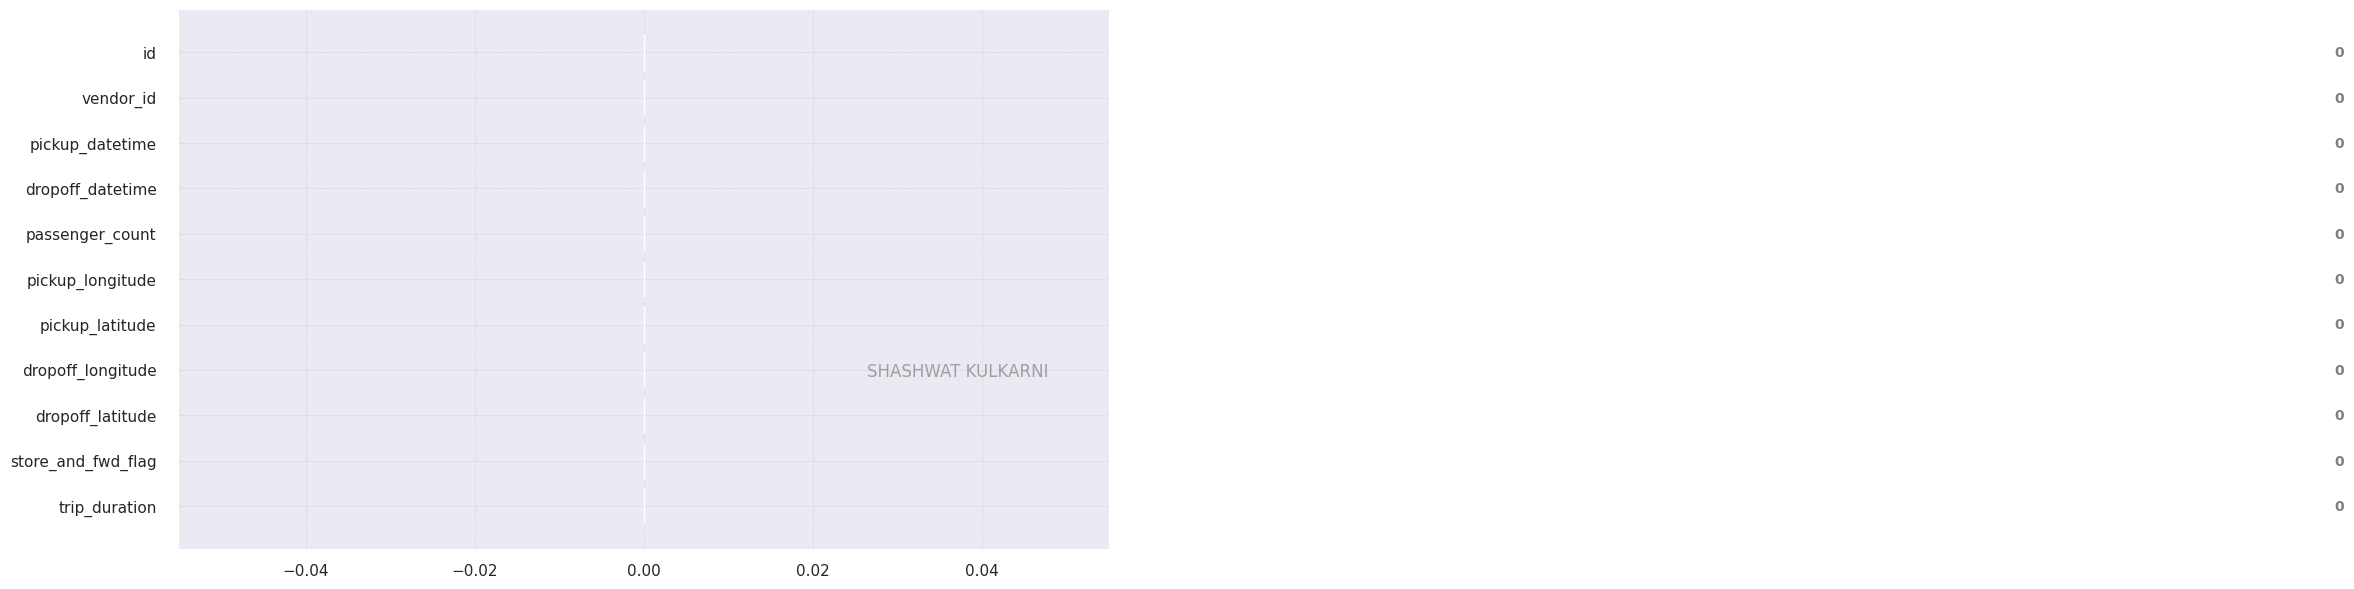

In [119]:
# Visualizing the missing values
# Visualizing the missing values
a=df.isnull().sum()
type(a)
b=dict(a)
col_name = list(b.keys())
null_values = list(b.values())

# Figure Size
fig, ax = plt.subplots(figsize =(12, 7))

# Horizontal Bar Plot
ax.barh(col_name, null_values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Text watermark
fig.text(0.85, 0.35, 'SHASHWAT KULKARNI', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [214]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [215]:
# Dataset Describe
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

### Variables Description

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
- Categorizing the features :

- Let's divide features into categories:

- Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

- Time related: pickup_datetime, dropoff_datetime

- Identifier: id(not useful for analysis)

- Others: vendor_id, passenger_count, store_and_fwd_flag


### Label details:
- trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [216]:
# Check Unique Values for each variable.
for i in df.columns:
  print(df[i].unique())

['id2875421' 'id2377394' 'id3858529' ... 'id2304944' 'id2714485'
 'id1209952']
[2 1]
['2016-03-14 17:24:55' '2016-06-12 00:43:35' '2016-01-19 11:35:24' ...
 '2016-01-10 07:35:15' '2016-04-22 06:57:41' '2016-01-05 15:56:26']
['2016-03-14 17:32:30' '2016-06-12 00:54:38' '2016-01-19 12:10:48' ...
 '2016-04-22 07:10:25' '2016-01-05 16:02:39' '2016-04-05 14:47:43']
[1 6 4 2 3 5 0 7 9 8]
[-73.98215485 -73.98041534 -73.97902679 ... -73.84746552 -73.89477539
 -73.84131622]
[40.76793671 40.73856354 40.7639389  ... 40.69665146 40.83586502
 40.82304382]
[-73.96463013 -73.9994812  -74.00533295 ... -73.85946655 -74.04266357
 -73.76462555]
[40.76560211 40.73115158 40.71008682 ... 40.65151978 40.64244461
 40.62860489]
['N' 'Y']
[  455   663  2124 ... 11513 72504  6124]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [217]:
# Write your code to make your dataset analysis ready.

In [218]:
df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1

In [219]:
new_df=df.copy()

In [220]:
new_df["pickup_datetime"][0]

'2016-03-14 17:24:55'

In [221]:
#Convert timestamp to datetime format to fetch the other details as listed below
new_df['pickup_datetime']=pd.to_datetime(new_df['pickup_datetime'])
new_df['dropoff_datetime']=pd.to_datetime(new_df['dropoff_datetime'])
new_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### What all manipulations have you done and insights you found?

#####Converting columns pickup_datetime,dropoff_datetime into to datetime format so that it becomes easier for further analysis


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

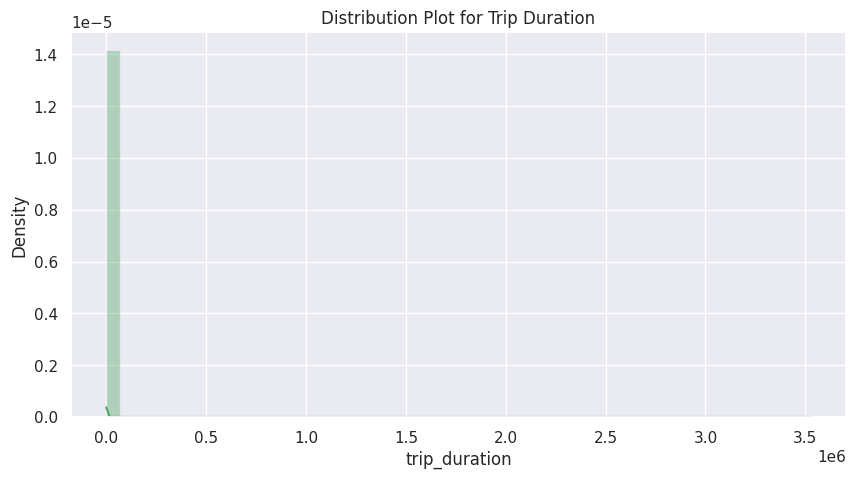

In [222]:
# Chart - 1 visualization code
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(new_df['trip_duration'],color="g").set(title='Distribution Plot for Trip Duration')

##### 1. Why did you pick the specific chart?

To check the target variable 'trip_duration' skewness,by above graph it's interpreted that it's highly positively skewed.

##### 2. What is/are the insight(s) found from the chart?

By above graph it's interpreted that it's highly positively skewed.

##### 3. Will the gained insights help creating a positive business impact?


Yes, it will be beneficial so that we have to normalize trip_duration for further model building.

#### Chart - 2

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

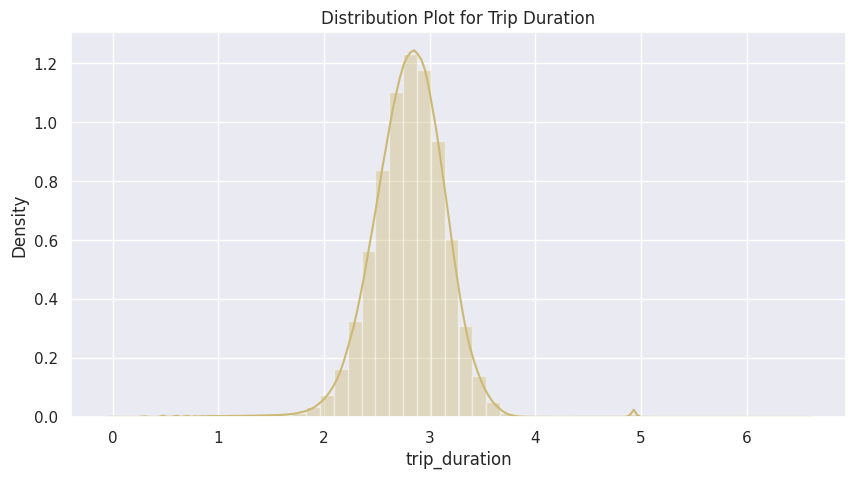

In [223]:
# Chart - 2 visualization code
# Since the above graph is positively skewed converting this into normalized form
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(np.log10(new_df['trip_duration']),color="y").set(title='Distribution Plot for Trip Duration')

##### 1. Why did you pick the specific chart?

The distplot properly shows the variable's skewness.

##### 2. What is/are the insight(s) found from the chart?

Now, it's been normalized with log10,so that it becomes easier for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Surely,it helps in more accurate prediction.

#### Chart - 3

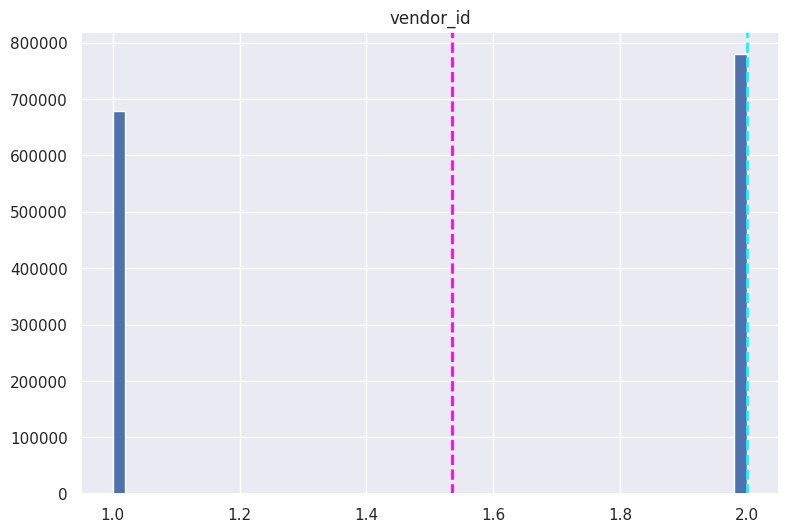

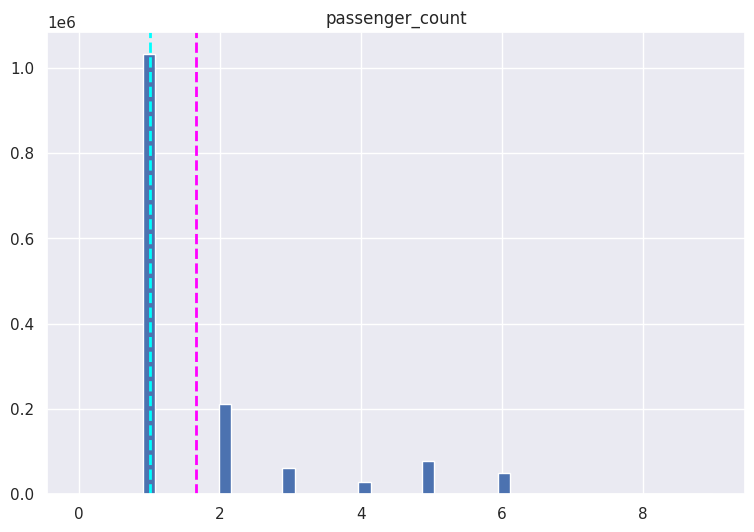

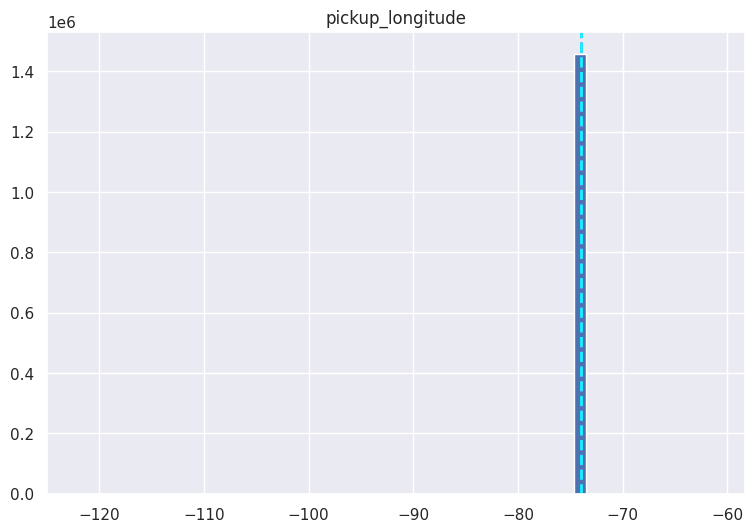

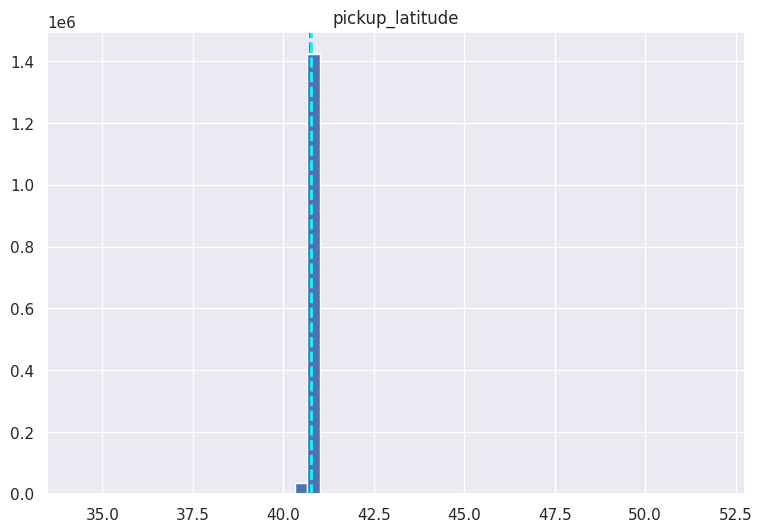

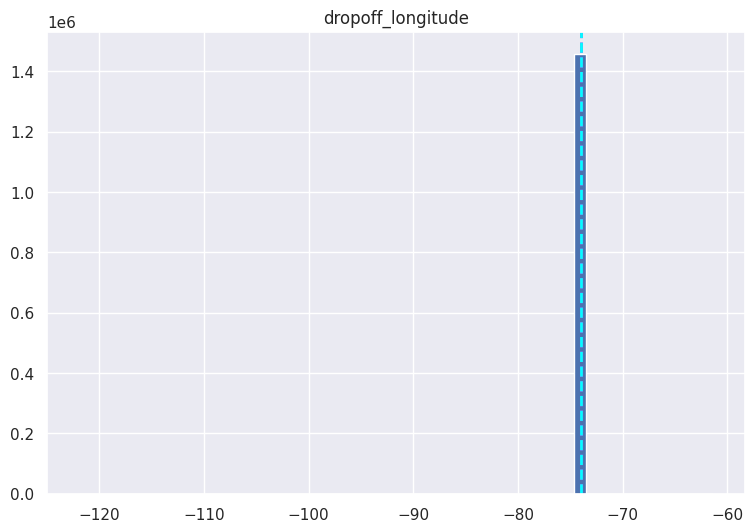

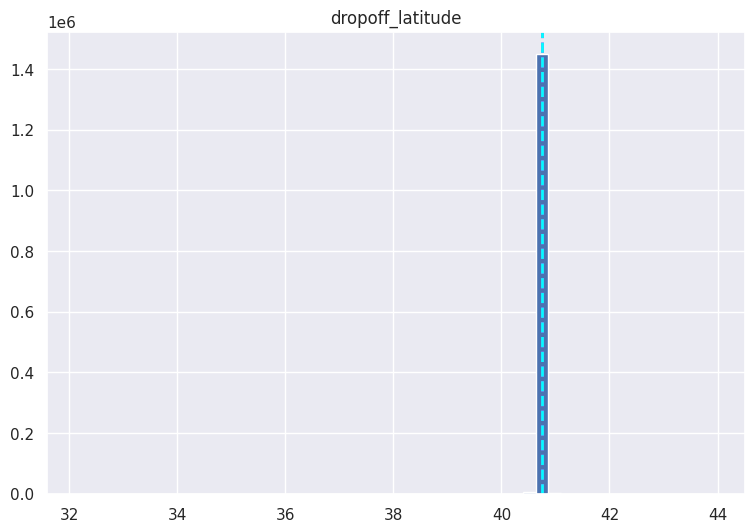

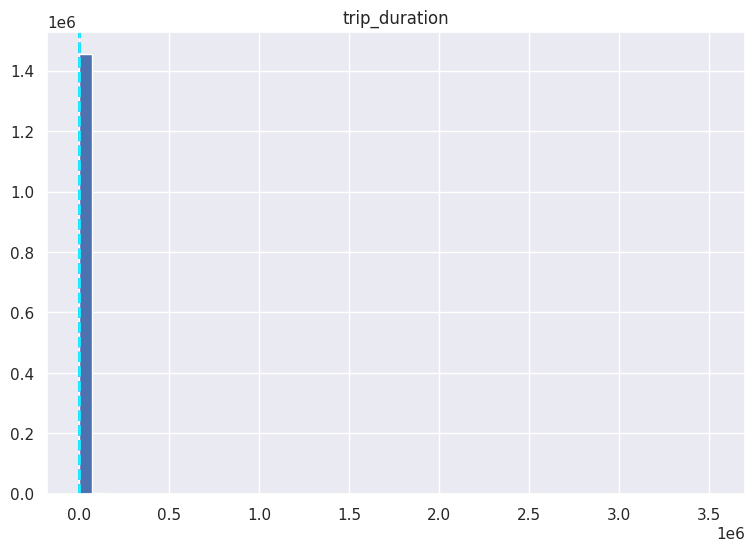

In [224]:
# Chart - 3 visualization code
# plot a bar plot for each categorical feature count

for col in new_df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = (new_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

The above vertical line graph show's how it's varying,or the distribution of it.

##### 2. What is/are the insight(s) found from the chart?

From above plot we can easily infer the mean and median of numerical variables in the dataset.

##### 3. Will the gained insights help creating a positive business impact?

Yah,it will help surely for further modelling of variables for further analysis.

#### Chart - 4

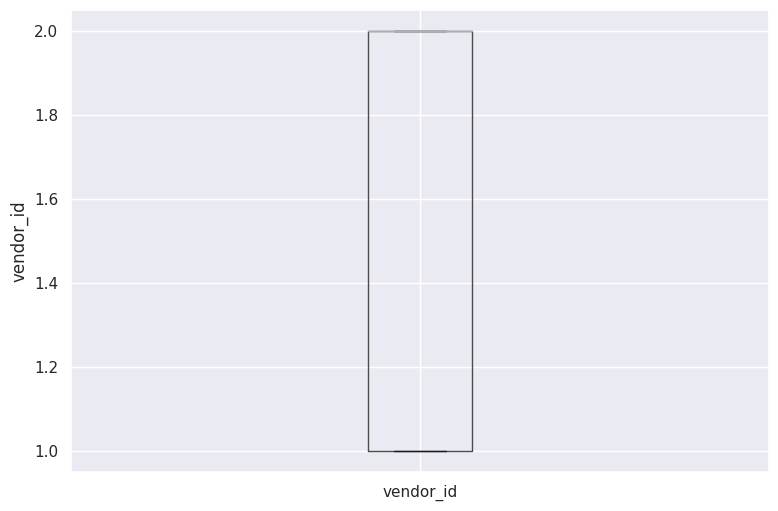

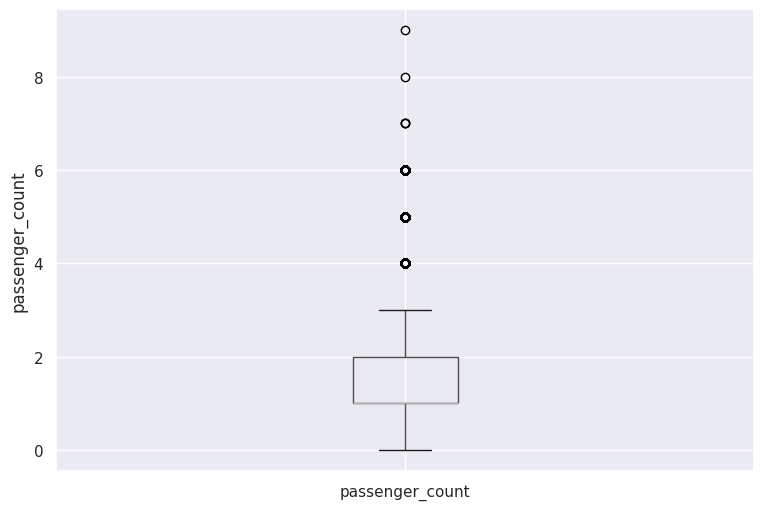

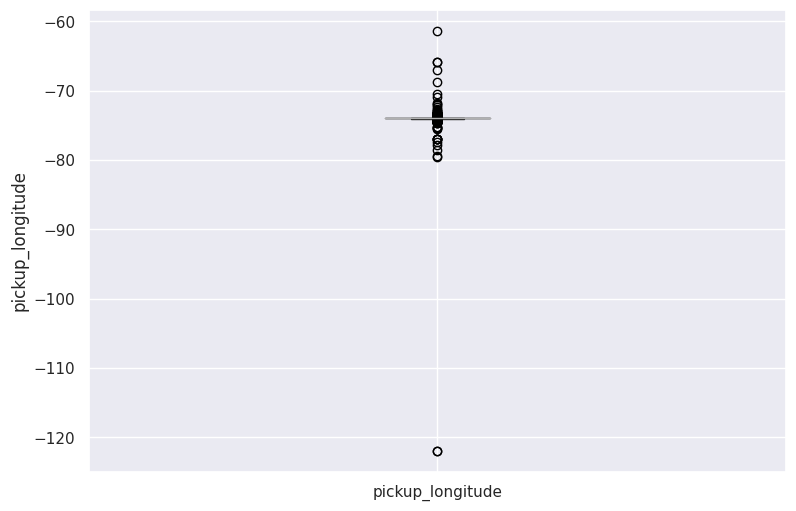

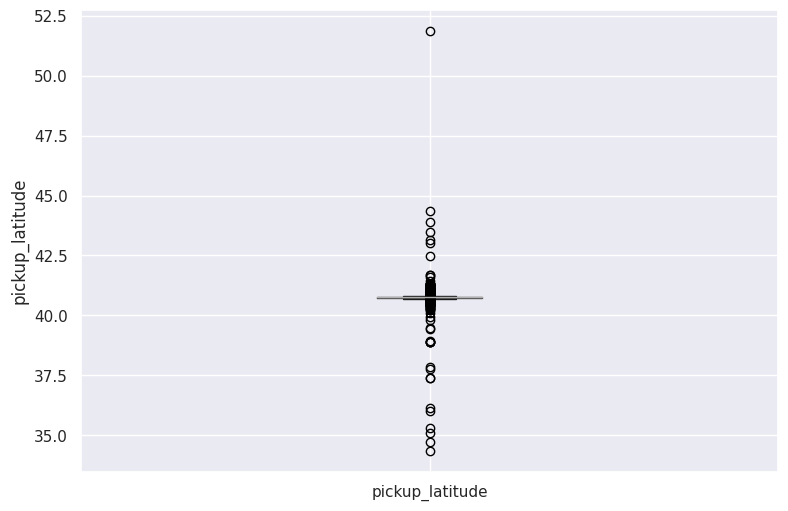

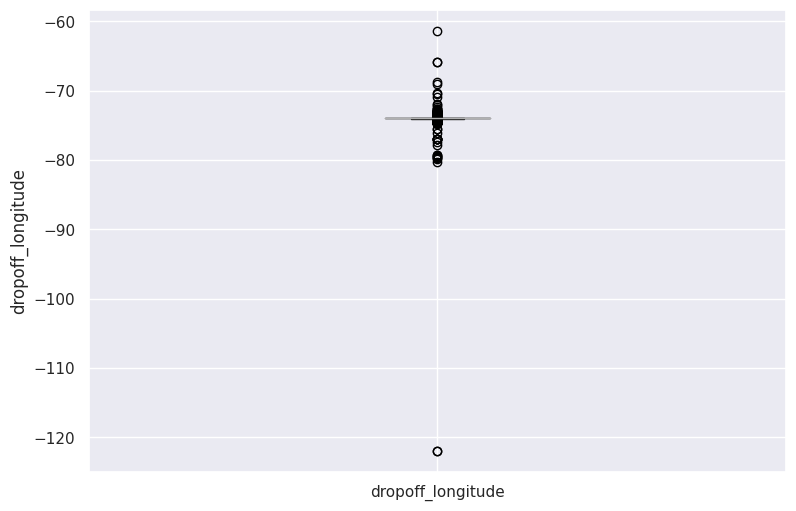

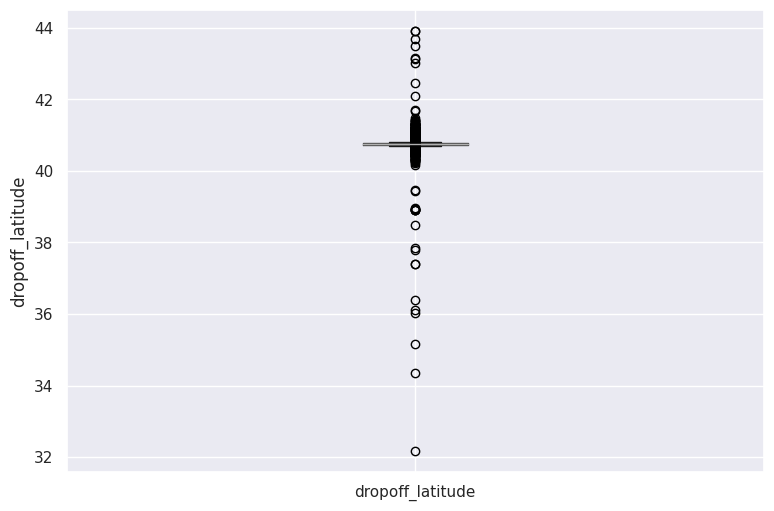

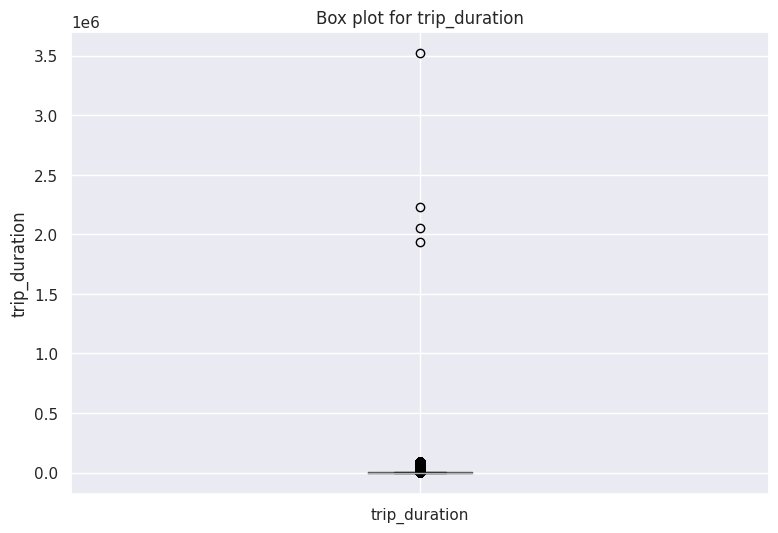

In [225]:
# Chart - 4 visualization code
# plot a boxplot for the label by each numerical feature
for col in new_df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is a chart that visually represents the distribution of numerical data through its quartiles, including the minimum, maximum, median, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?



1.   Vendor ID has no outlier.
2.   In passenger count 4 and more passengers are being treated as outliers.
3.pickup_longitude and pickup_latitude has outliers as well.
4.dropoff_longitude and dropoff_latitude has outliers too.
5.Our target variable trip_duration has alot of outliers


##### 3. Will the gained insights help creating a positive business impact?


Yah,it will surely help for further accurate analysis of data by removing outliers.

#### Chart - 5

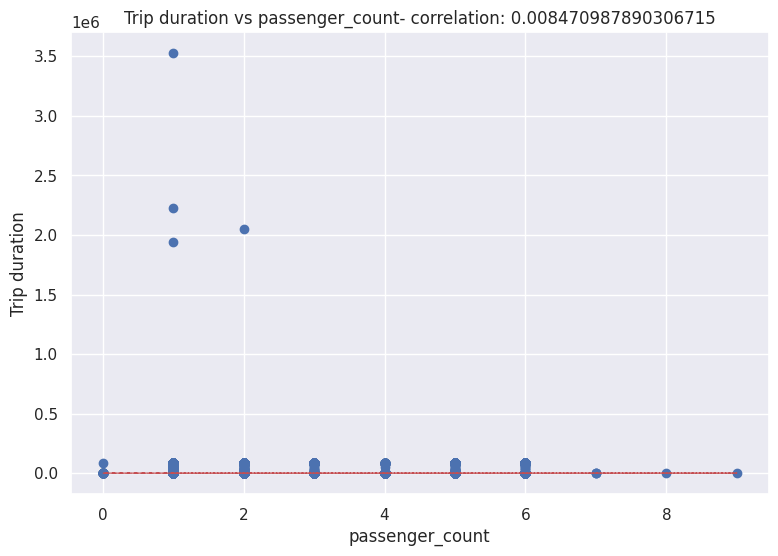

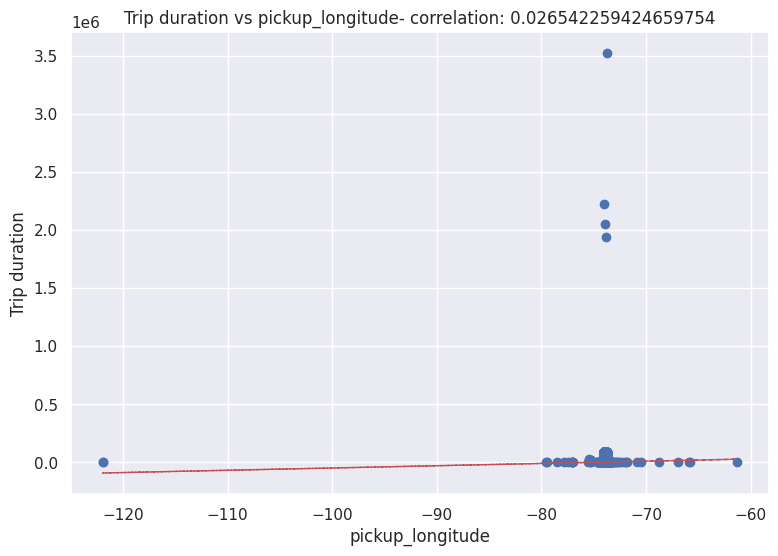

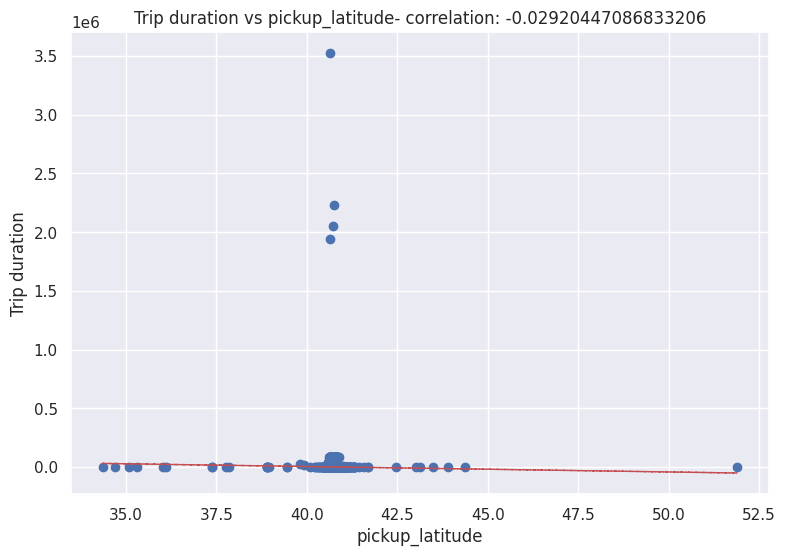

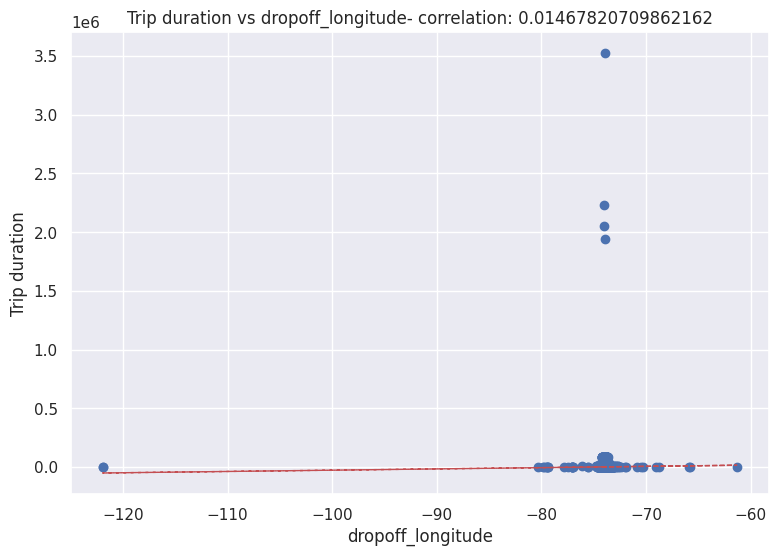

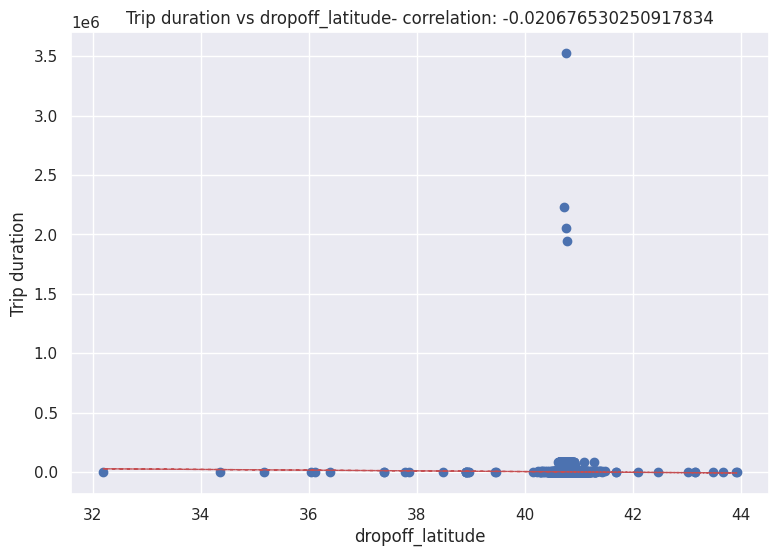

In [226]:
# Chart - 5 visualization code
for col in new_df.describe().columns[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = new_df[col]
    label = new_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(new_df[col], new_df['trip_duration'],1)
    y_hat = np.poly1d(z)(new_df[col])

    plt.plot(new_df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above plot shows correlation and variation of variable with target variable is shown.

##### 2. What is/are the insight(s) found from the chart?

Correlation of variables with target variables are inferred.

##### 3. Will the gained insights help creating a positive business impact?

Yah,from above graph it's inferred that which all features are important for prediction of trip_duration .Less important features are been dropped since they have no impact on target variable.

#### Chart - 6

(-74.03, -73.75)

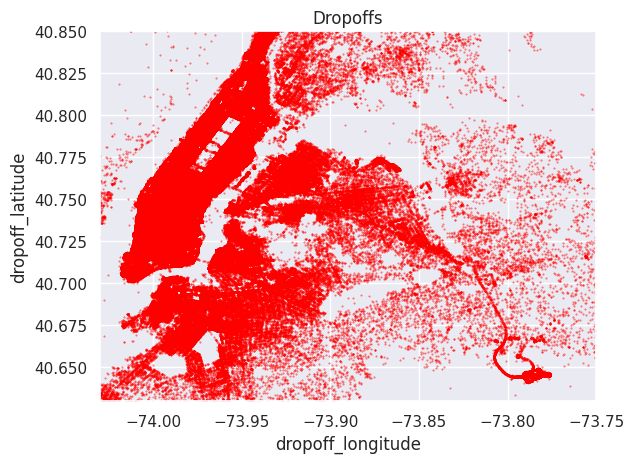

In [227]:
# Chart - 6 visualization code
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

new_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

##### 1. Why did you pick the specific chart?

A scatterplot is a graphical representation that uses dots to display values for two different numeric variables, showing the relationship between them.It shows dropoff region.

##### 2. What is/are the insight(s) found from the chart?

It shows dropoff region of taxi.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yah,it help in removing the outliers so that it doesn't affect the accuracy of the model.

#### Chart - 7

(-74.03, -73.75)

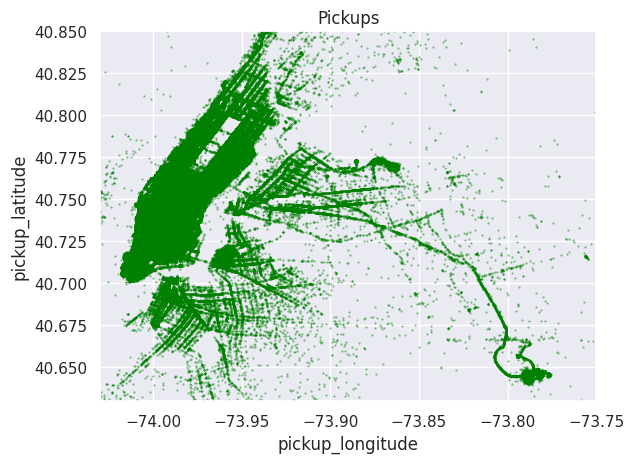

In [228]:
# Chart - 7 visualization code
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

new_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

##### 1. Why did you pick the specific chart?

A scatterplot is a graphical representation that uses dots to display values for two different numeric variables, showing the relationship between them.It shows pickup region.

##### 2. What is/are the insight(s) found from the chart?

It shows pickup region of taxi

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yah,it help in removing the outliers so that it doesn't affect the accuracy of the model.

#### Chart - 8

In [229]:
new_df['trip_duration_hour']=new_df['trip_duration']/3600
new_df['log_trip_duration']=np.log(new_df.trip_duration_hour)

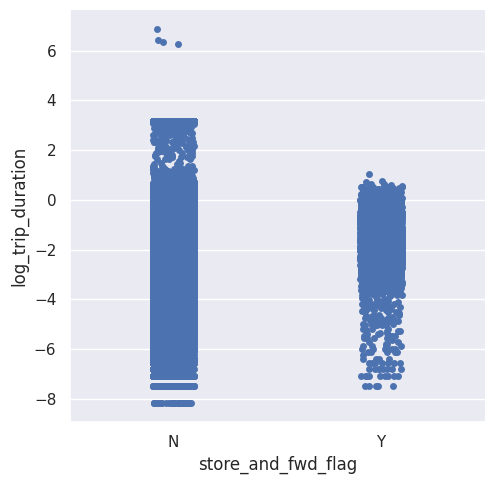

In [230]:
# Chart - 8 visualization code
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=new_df)

##### 1. Why did you pick the specific chart?

The above plot shows normalized view of the values present in column.

##### 2. What is/are the insight(s) found from the chart?

Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:
Outstation trips didn't had proper connection at the time when trip completes.
Temporary loss of signals while the trip was about to finish
Inconsistent signal reception over the trip duration.
The GPS or mobile device battery was down when the trip finished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yah,there will be a positive impact of this for further analysis,businesses will try to avail a good connection to server,so the data can properly accumulated.

#### Chart - 9

In [231]:
# Chart - 12 visualization code
import folium
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

##### 1. Why did you pick the specific chart?

The above map shows New York City area where taxi service is operational.

##### 2. What is/are the insight(s) found from the chart?

It shows what areas taxi service is operational,which helps analyze data in city easily.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes,we will analyze those data only which are located in city and removing outliers so as to optimize models performance.

#### Chart - 10

In [232]:
# Chart - 13 visualization code
for i in new_df.index[:100]:
  folium.Marker(location=[new_df['pickup_latitude'][i],new_df['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [233]:
for i in new_df.index[:100]:
  folium.Marker(location=[new_df['dropoff_latitude'][i],new_df['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

##### 1. Why did you pick the specific chart?

It shows pickup and drop points visually.

##### 2. What is/are the insight(s) found from the chart?

Visualized top 100 pickup and dropoff points in map which is more intutive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes,it helps in visualizing the area where the business services are accessed and till what area the services are spread.

#### Chart - 11 - Correlation Heatmap

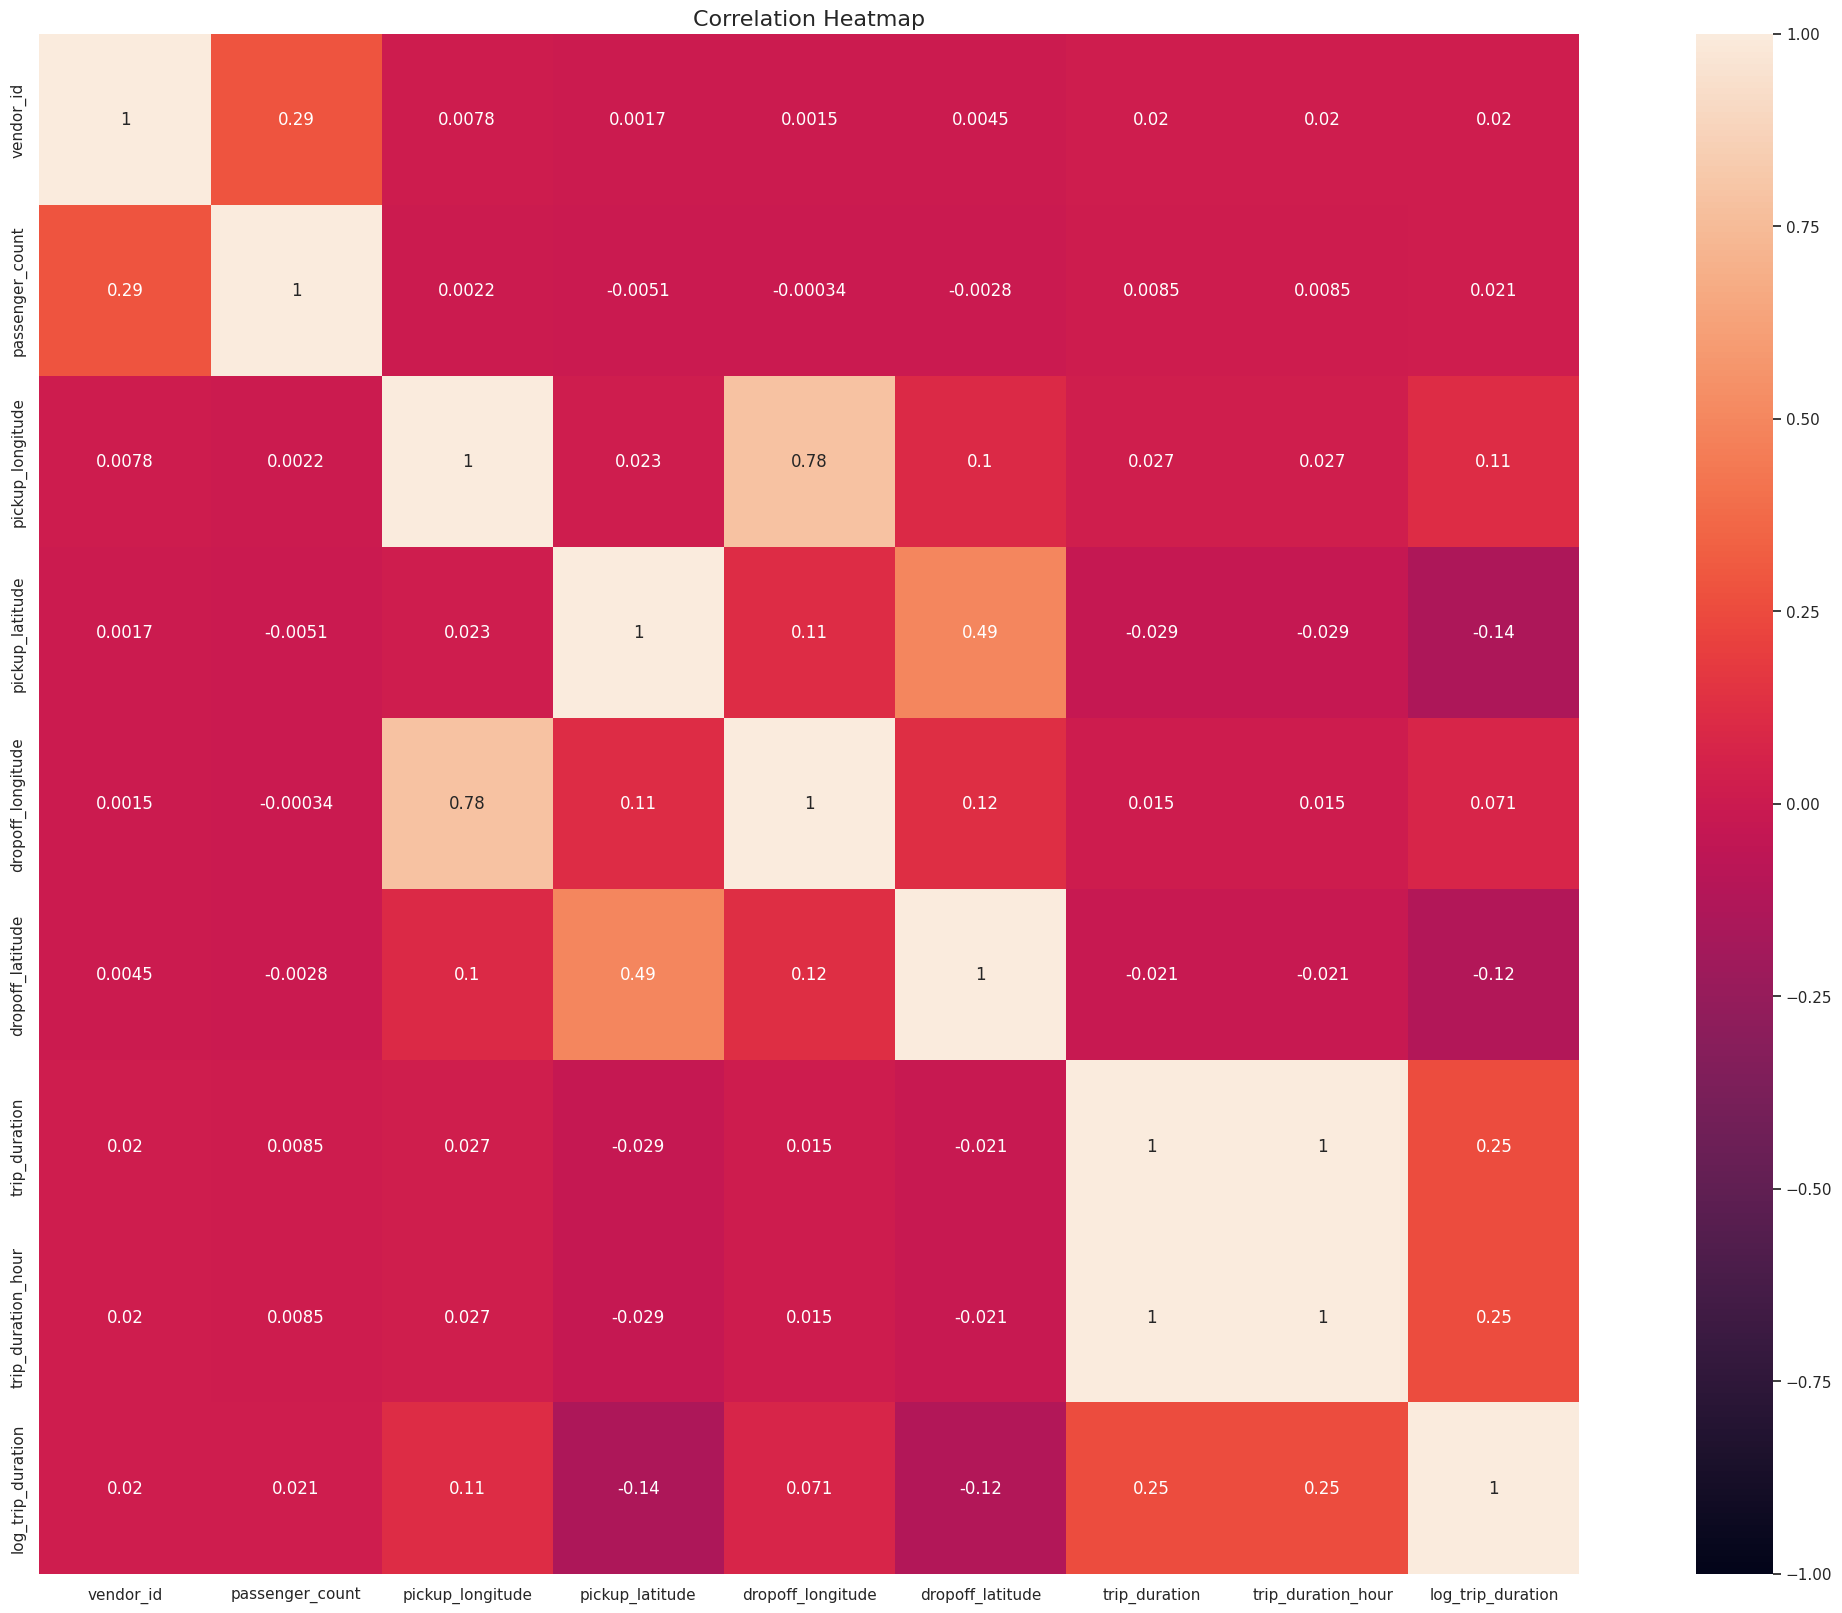

In [234]:
# Correlation Heatmap visualization code
# new_df.corr()
plt.figure (figsize= (30,20))

sns.heatmap(new_df.corr(), annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen because it visually represents the relationships between multiple variables, making it easier to identify patterns and potential multicollinearity¹. This aids in feature selection and improves the integrity of the model.


##### 2. What is/are the insight(s) found from the chart?

Features related to passenger count,location,distance,time of travel,store and forward flag and day of travel,these are important features in predicting trip duration hour.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [235]:
# Handling Missing Values & Missing Value Imputation
new_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
trip_duration_hour    0
log_trip_duration     0
dtype: int64

In [236]:
new_df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Since there are no missing values nothing is to be done**

### 2. Handling Outliers

In [237]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [238]:
# adding column for distance
#Calculate distance and assign new column to the dataframe.
new_df["distance"] = new_df.apply(lambda x: calc_distance(x),axis=1)

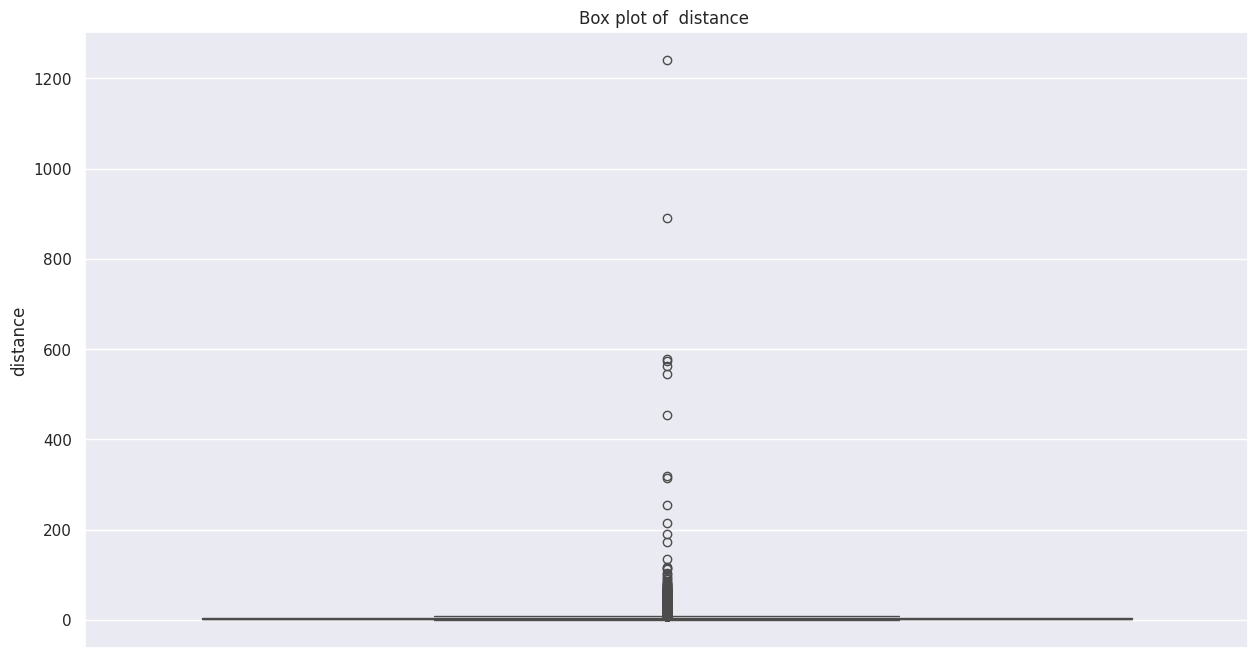

In [239]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=new_df['distance'], orient="v")

In [240]:
percentile_q1 = np.percentile(new_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(new_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(new_df['distance'],75)
print(percentile_q3)

1.231838267692074
2.0937200248916445
3.8753427710757147


In [241]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.733418487383387
Upper limit for outlier  : 7.840599526151175


In [242]:
new_df=new_df[new_df['distance']>lower_limit_outlier]
new_df=new_df[new_df['distance']<upper_limit_outlier]

In [243]:
new_df.shape

(1317971, 14)

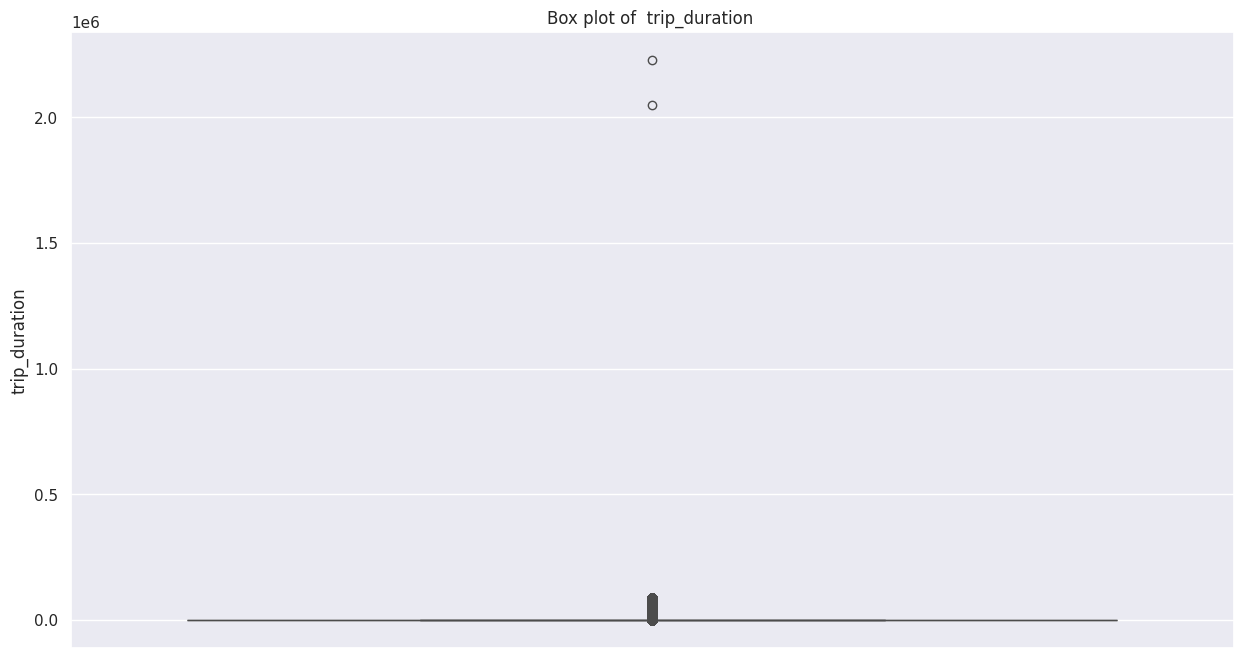

In [244]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=new_df['trip_duration'], orient="v")

In [245]:
percentile_q1_trip_duration = np.percentile(new_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(new_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(new_df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [246]:

iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [247]:

new_df=new_df[new_df['trip_duration']>0]
new_df=new_df[new_df['trip_duration']<upper_limit_outlier_trip_duration]

In [248]:
new_df.shape

(1277396, 14)

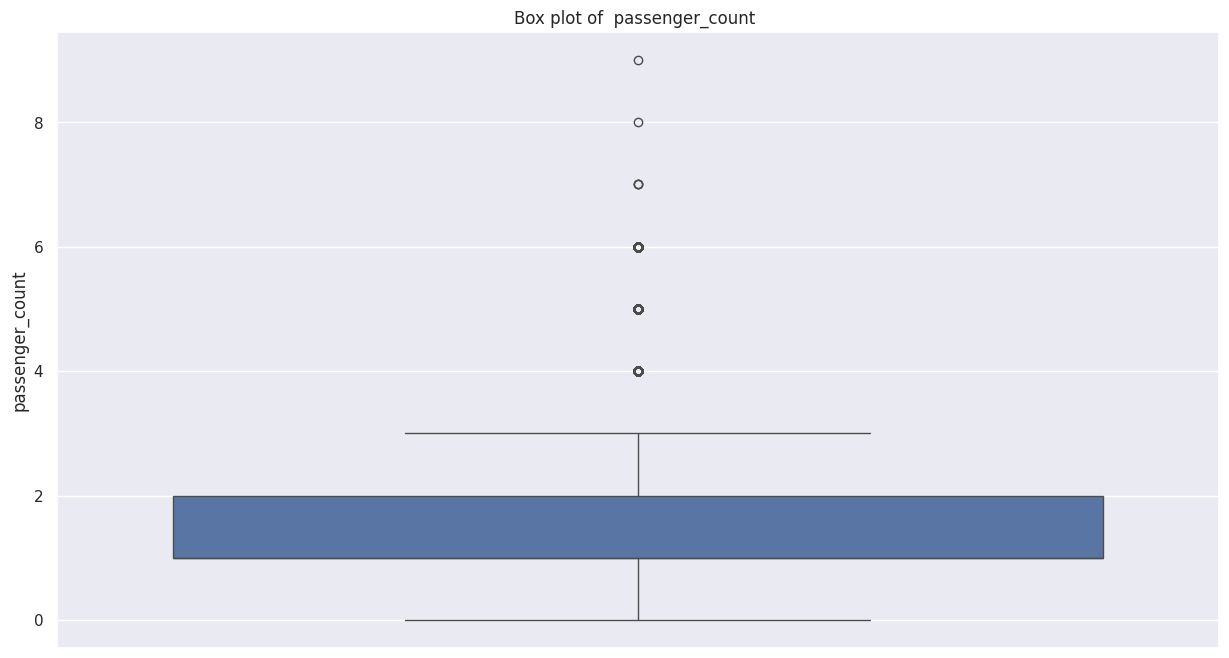

In [249]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=new_df['passenger_count'])

In [250]:
percentile_q1_passenger_count = np.percentile(new_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(new_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(new_df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [251]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [252]:

new_df=new_df[new_df['passenger_count']>0]
new_df=new_df[new_df['passenger_count']<upper_limit_outlier_passenger_count]

In [253]:
new_df.shape

(1142603, 14)

##### What all outlier treatment techniques have you used and why did you use those techniques?

### Outlier Detection using IQR Method


IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier
remove the outlier present in distance,trip duration and passenger count

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [254]:
# adding a column for which day travel
# %A: Full name of the day. Like, Monday
new_df['pickup_day']=new_df['pickup_datetime'].dt.day_name()
new_df['drop_day']=new_df['dropoff_datetime'].dt.day_name()


In [255]:
new_df['pickup_day'].value_counts()

Saturday     176071
Friday       174623
Thursday     169399
Wednesday    164073
Tuesday      159183
Sunday       152126
Monday       147128
Name: pickup_day, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

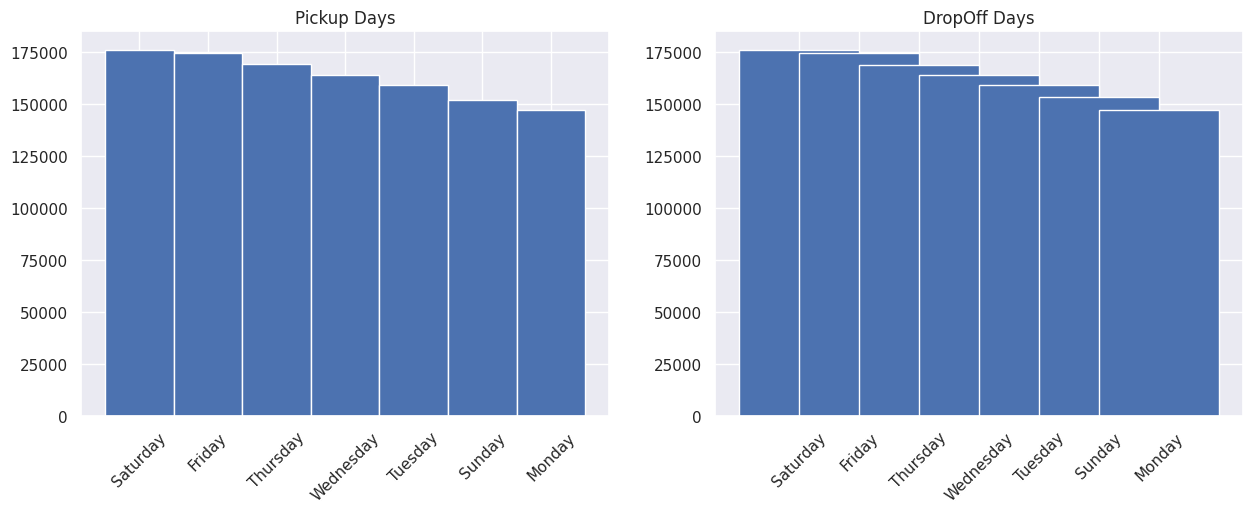

In [256]:
a=dict(new_df['pickup_day'].value_counts())
b=dict(new_df['drop_day'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Pickup Days")
plt.bar(a.keys(),a.values(),1)
plt.xticks(rotation=45)
plt.subplot(1,2,2)

plt.title("DropOff Days")
plt.bar(b.keys(),b.values(),2)
plt.xticks(rotation=45)

In [257]:

import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

new_df['pickup_timezone']=new_df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
new_df['dropoff_timezone']=new_df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

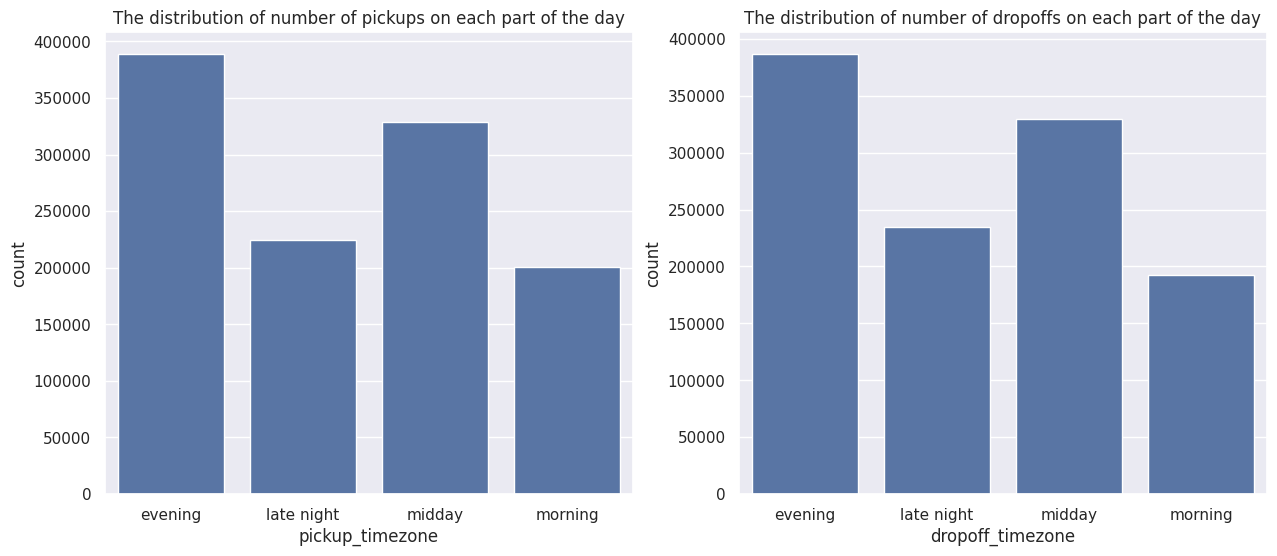

In [258]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.countplot(x='pickup_timezone',data=new_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=new_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

In [259]:
# Manipulate Features to minimize feature correlation and create new features
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
new_df["year"] = new_df["pickup_datetime"].apply(lambda x: x.year)
new_df["month"] = new_df["pickup_datetime"].apply(lambda x: x.month)
new_df["day_num"] = new_df["pickup_datetime"].apply(lambda x: x.day)
new_df["hour"] = new_df["pickup_datetime"].apply(lambda x: x.hour)
new_df["minute"] = new_df["pickup_datetime"].apply(lambda x: x.minute)

In [260]:
new_df['trip_duration_hour']=new_df['trip_duration']/3600
new_df['log_distance']=np.log(new_df.distance)
new_df['log_trip_duration']=np.log(new_df.trip_duration_hour)

<Axes: xlabel='distance', ylabel='trip_duration'>

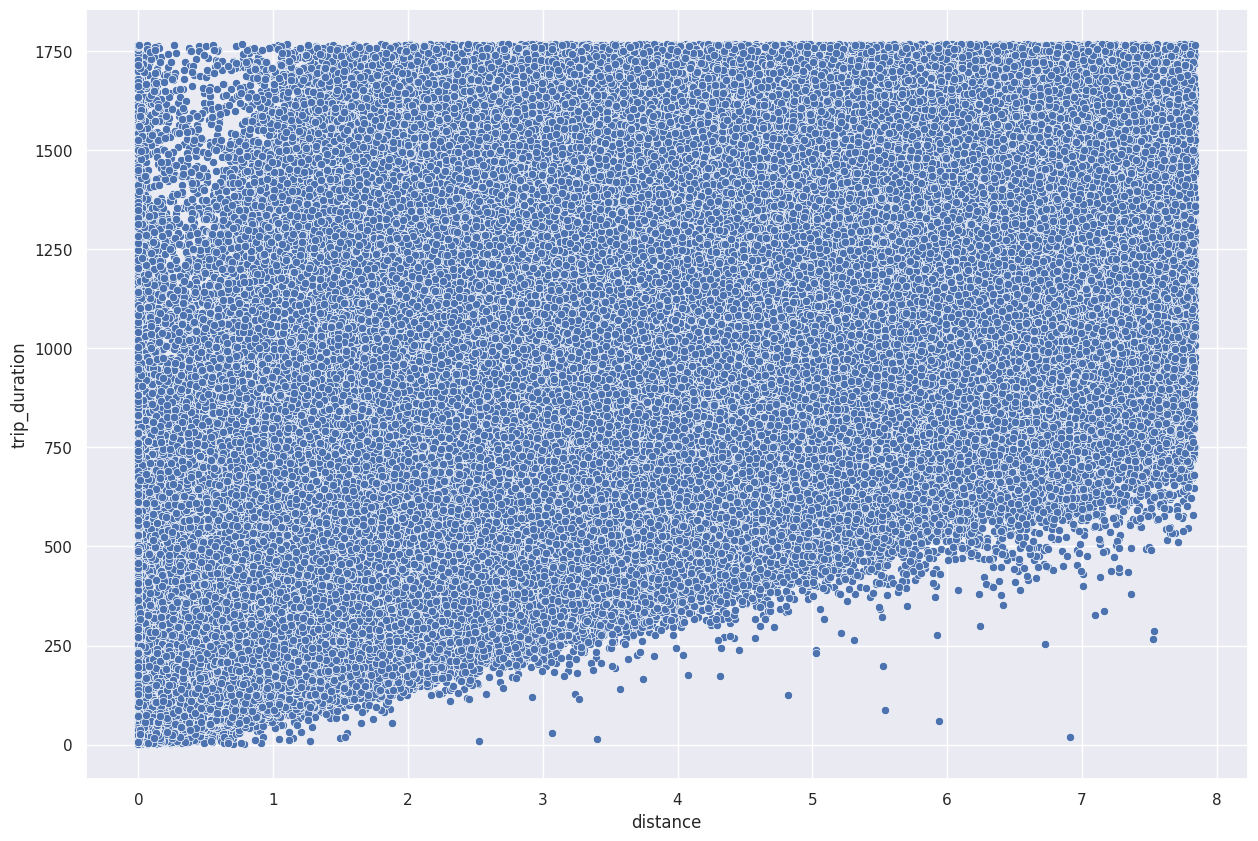

In [261]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=new_df)

<Axes: xlabel='log_distance', ylabel='log_trip_duration'>

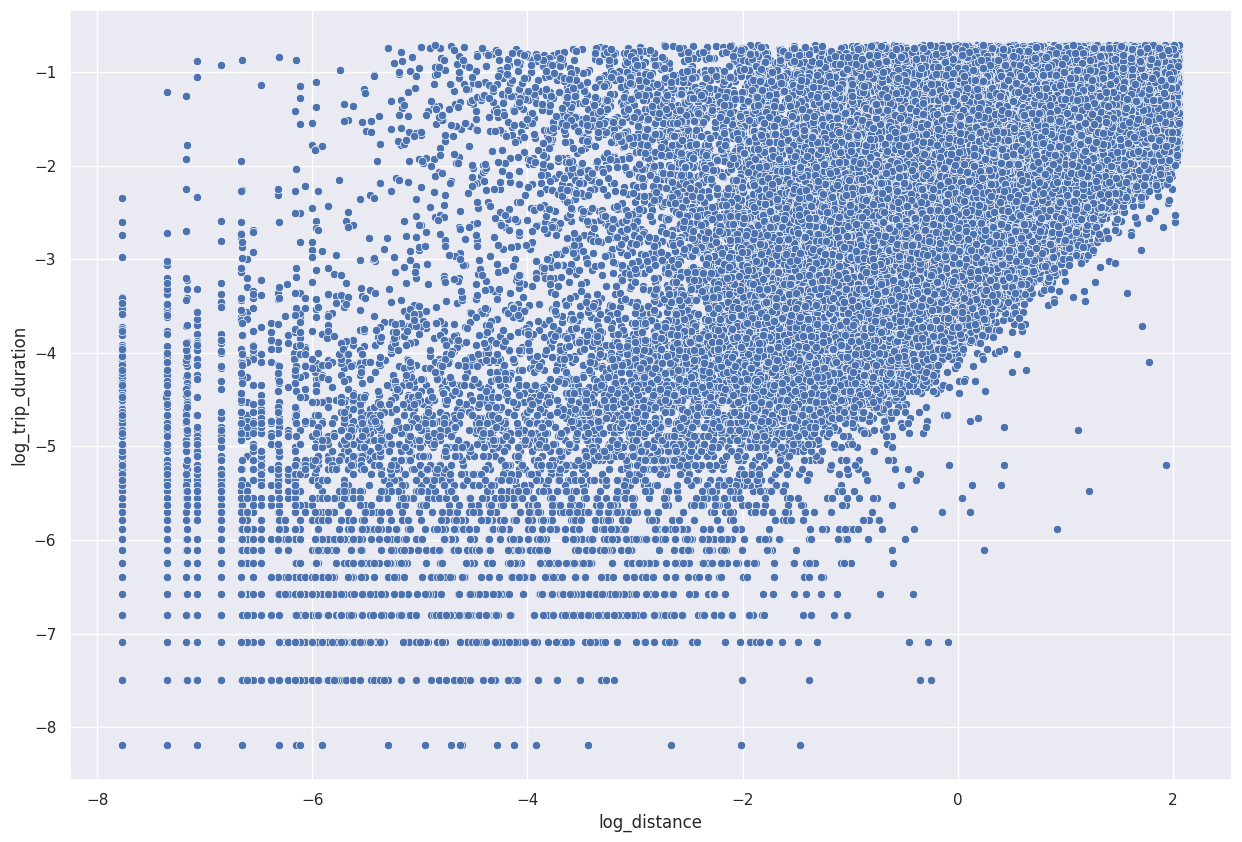

In [262]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=new_df)

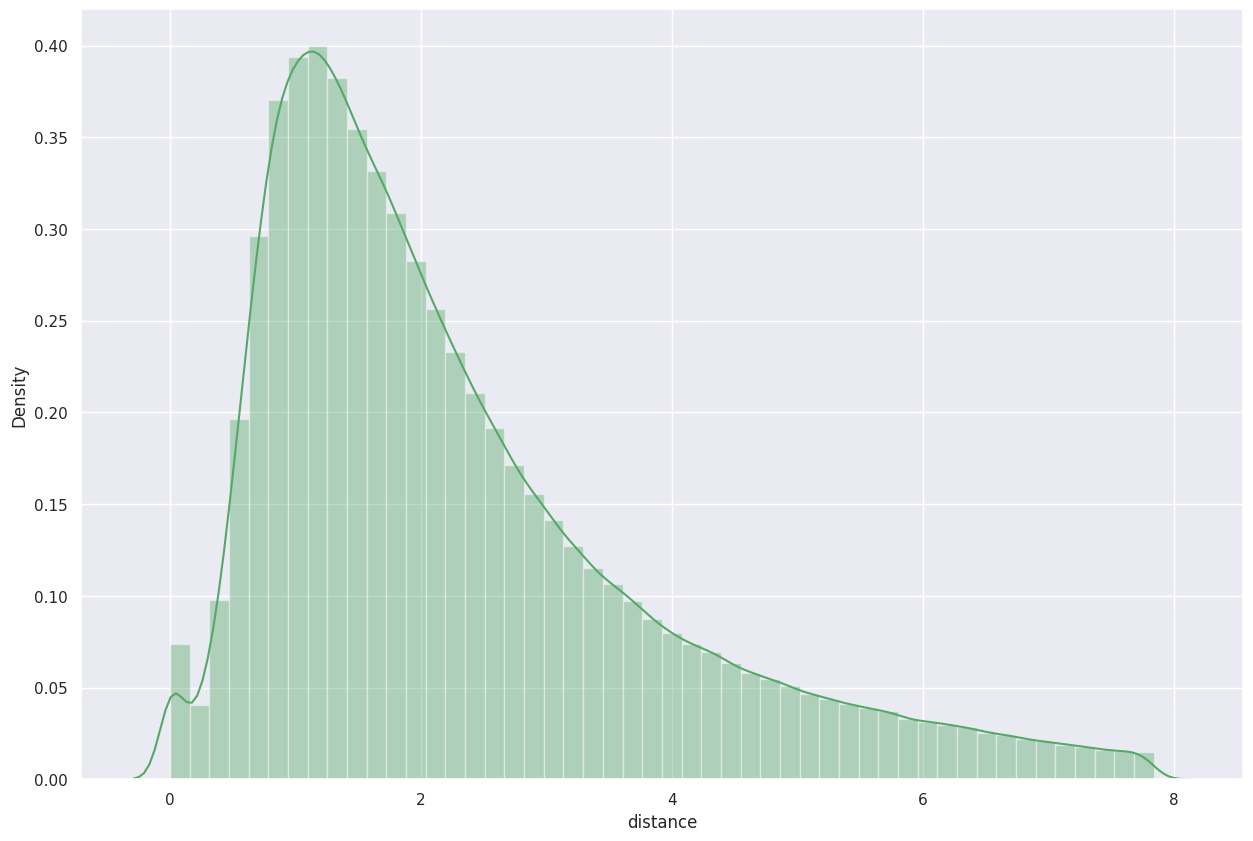

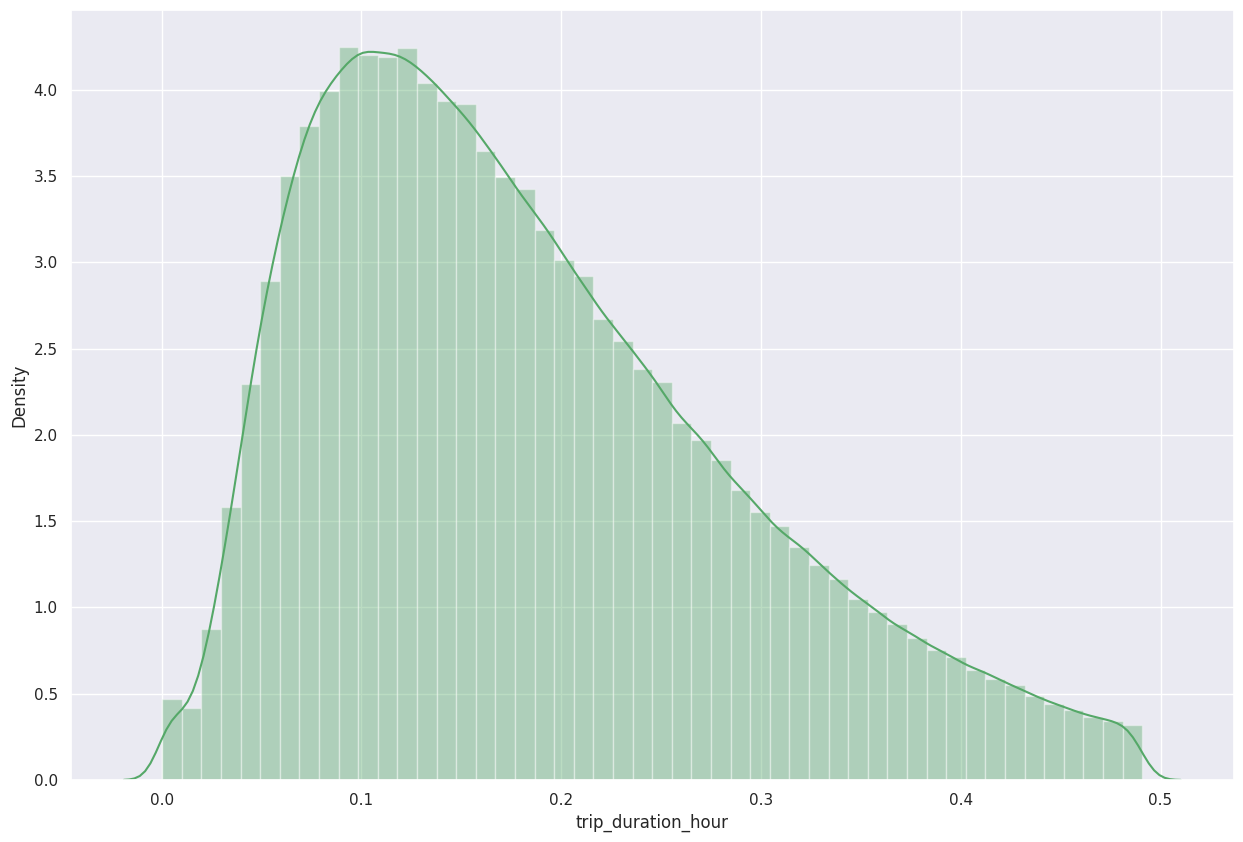

In [263]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(new_df[i],color="g")

In [264]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
n_df= pd.get_dummies(new_df, columns=["store_and_fwd_flag", "pickup_day"], prefix=["store_and_fwd_flag",'Day'])

In [265]:
n_df.shape

(1142603, 31)

In [266]:
n_df.head(3)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   

   dropoff_latitude  trip_duration  ...  log_distance  store_and_fwd_flag_N  \
0         40.765602            455  ...      0.404480                     1   
1         40.731152            663  ...      0.590843                     1   
3         40.706718            429  ...      0.395752                     1   

   store_and_fwd_flag_Y Day_Friday Day_Monday Day_Saturday  Day_Sunday  \
0                     0          0          1            0           0   
1                     0          0          0            0           1   
3                     0          0          0            0           0   

   Day_Thursday  Day_Tuesday  Day_Wednesday  
0             0            0              0  
1             0            0              0  
3             0            0              1  

[3 rows x 31 columns]

In [267]:
n_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'trip_duration_hour', 'log_trip_duration', 'distance', 'drop_day',
       'pickup_timezone', 'dropoff_timezone', 'year', 'month', 'day_num',
       'hour', 'minute', 'log_distance', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

#### 2. Feature Selection

In [268]:
# Select your features wisely to avoid overfitting
#Feature for the Machine learning models
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [269]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=n_df[newdata]

##### Which all features you found important and why?

Features related to passenger count,location,distance,time of travel,store and forward flag and day of travel,these are important features to predict trip duration hour.

### 4. Data Scaling

In [270]:
# Scaling your data
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = n_df[features].apply(zscore)[:100000]
y=n_df['trip_duration_hour'][:100000]

##### Which method have you used to scale you data and why?

* Handling Outliers: The Z-score method is less sensitive to outliers compared to other scaling methods3. This is important in a dataset like the NYC Taxi Trip Time Prediction, where outliers (such as unusually long or short taxi trips) might be present.

* Standardization: The Z-score method transforms the data to have a mean of 0 and a standard deviation of 112345. This ensures that all features have the same scale, which is important for many machine learning algorithms.

* Improving Model Performance: By ensuring all features are on the same scale, the Z-score method can help improve the performance of machine learning models.

### 5. Data Splitting

In [271]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [272]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=350)

In [273]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


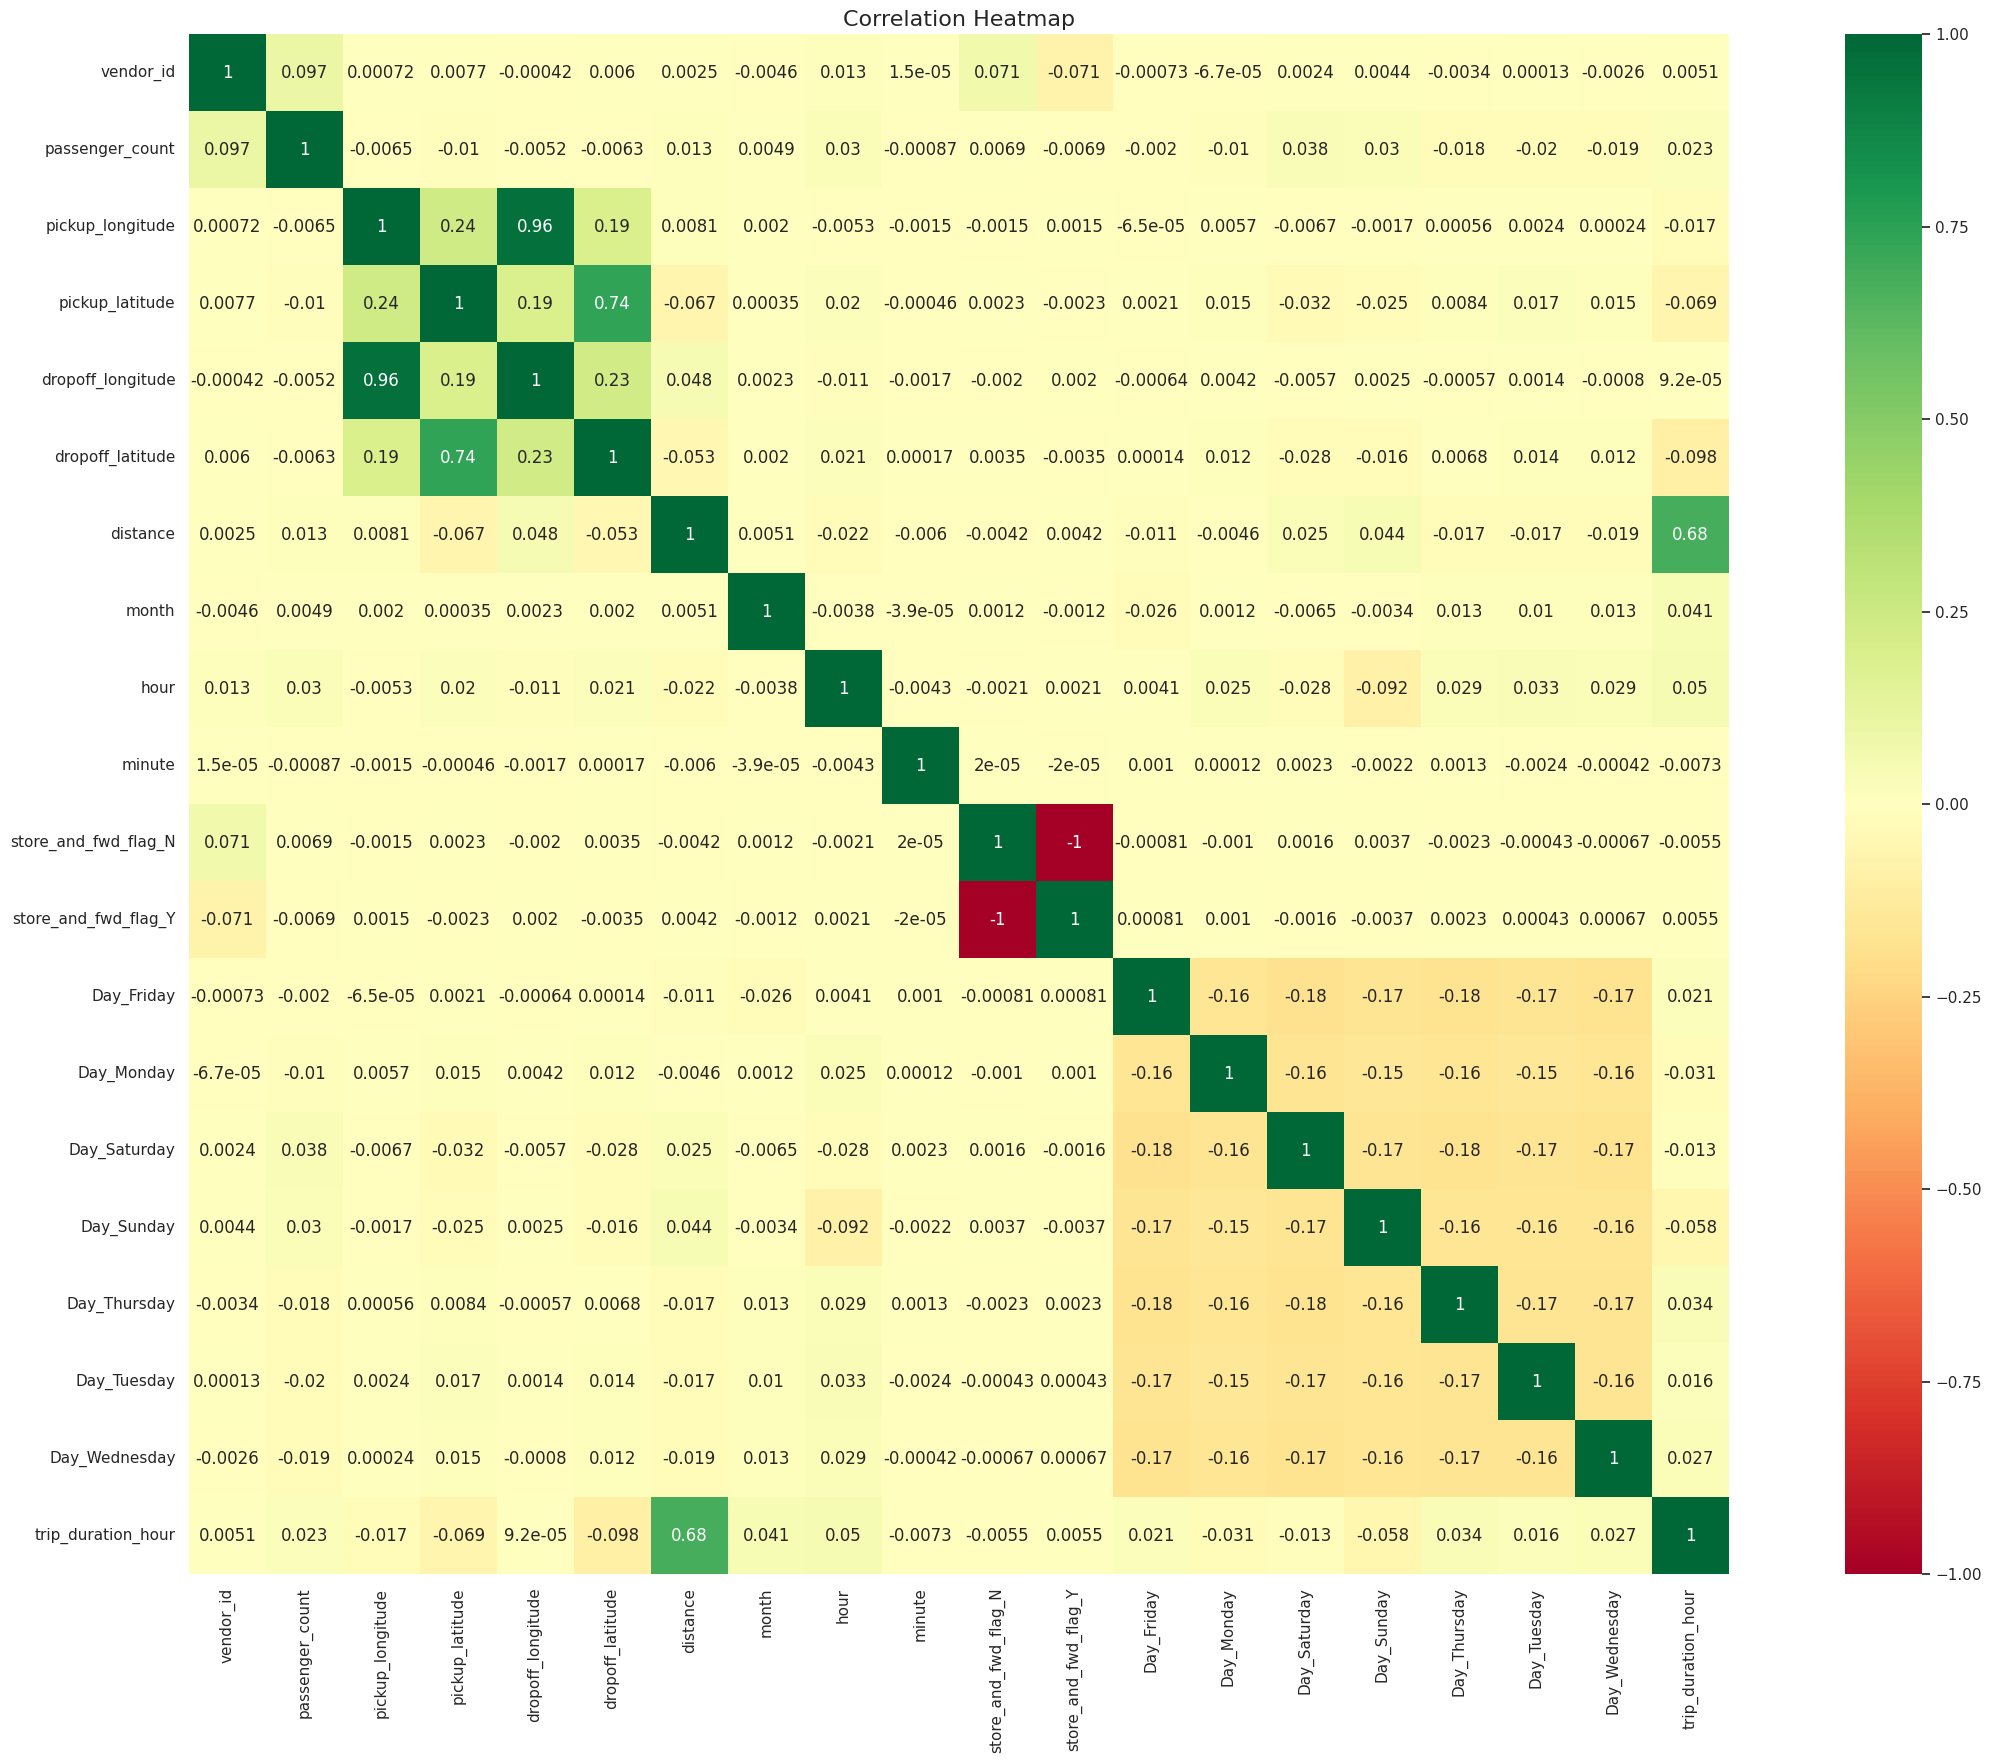

In [274]:
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [275]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100])
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')



  return (MSE,RMSE,R2,Adjusted_R2)


##### What data splitting ratio have you used and why?

Splitting ratio , I used is 80:20,from this 80% of data has gone for training and 20% is used for testing purpose

## ***6. ML Model Implementation***

### ML Model - 1

In [276]:
# ML Model - 1 Implementation
# Instance the linear regression object
# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)

In [277]:
reg.score(X_train, y_train)

0.4955839432467627

In [278]:
# Predict on the model on train dataset
y_pred_train = reg.predict(X_train)

In [279]:
# Predict on the model on test dataset
y_pred_test = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4955839432467627 Adjusted R2 : 0.4954641144760912


(0.0055, 0.07416198487095663, 0.4955839432467627, 0.4954641144760912)

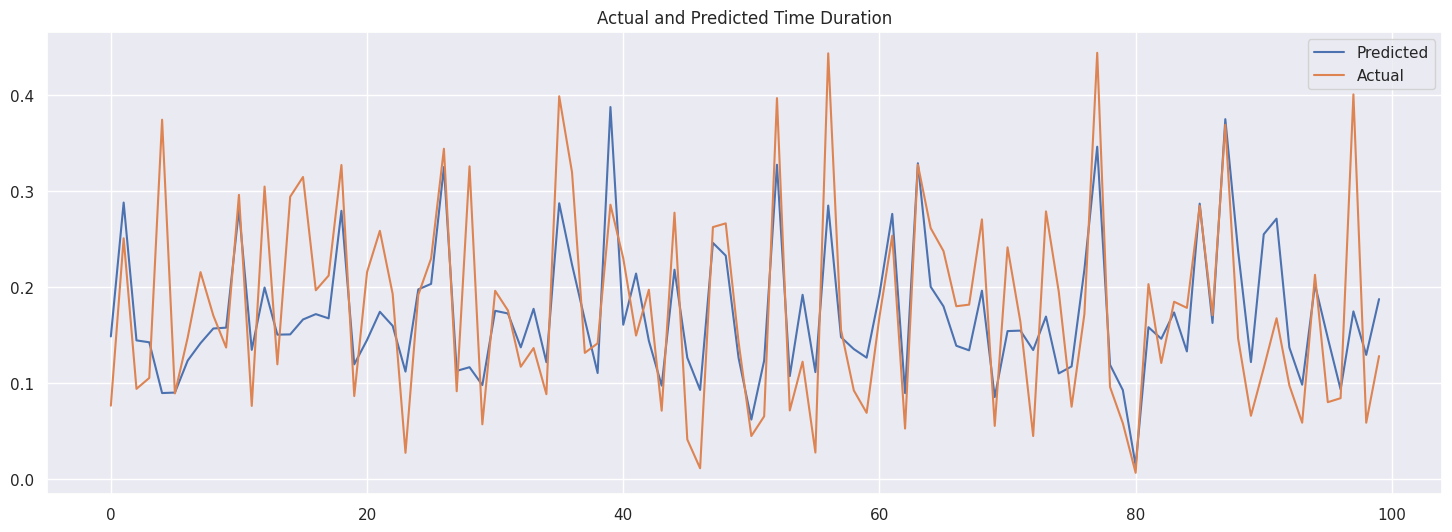

In [280]:
# Visualizing evaluation Metric Score chart
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)

MSE : 0.0056 RMSE : 0.07483314773547883
R2 : 0.5045680036956521 Adjusted R2 : 0.5040968721676351


(0.0056, 0.07483314773547883, 0.5045680036956521, 0.5040968721676351)

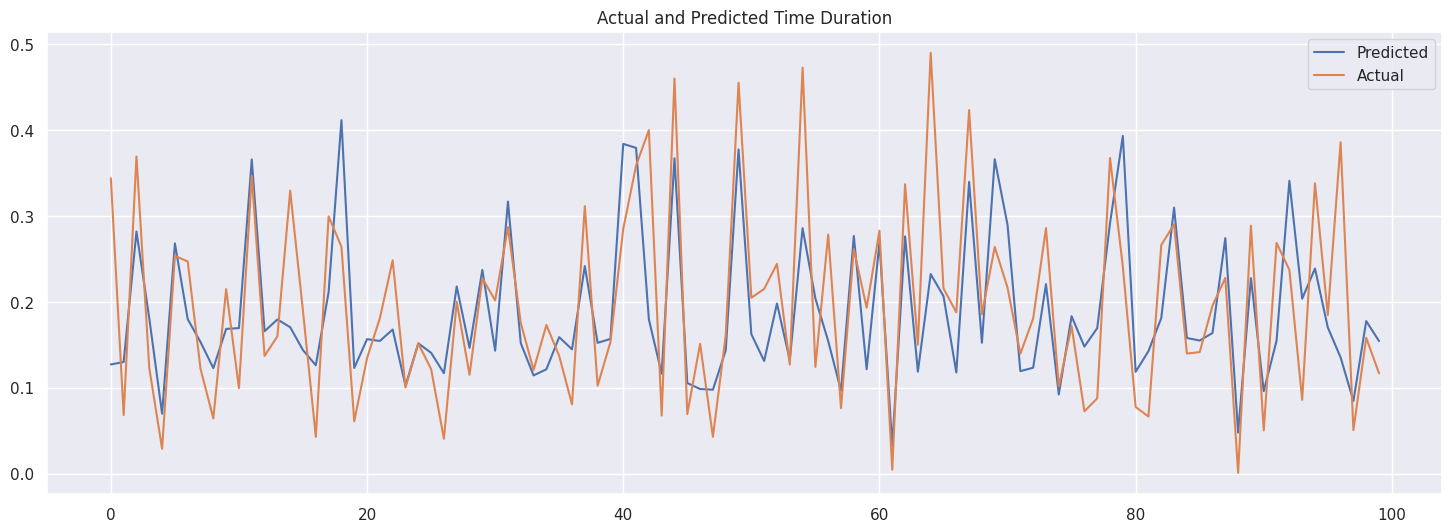

In [281]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

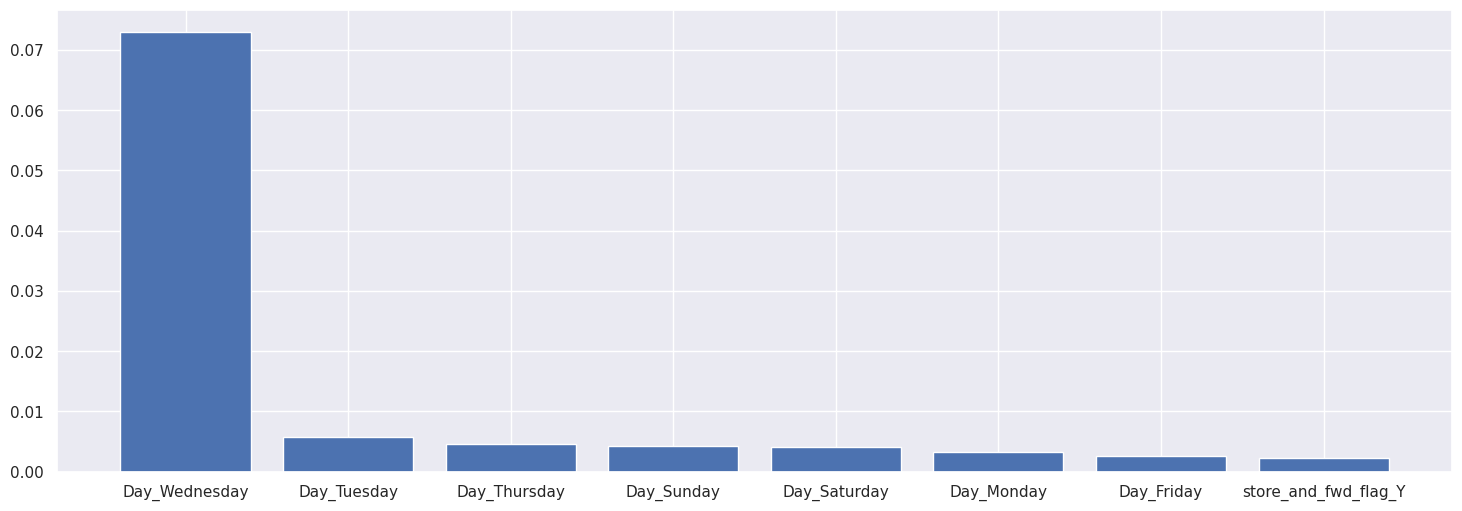

In [282]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

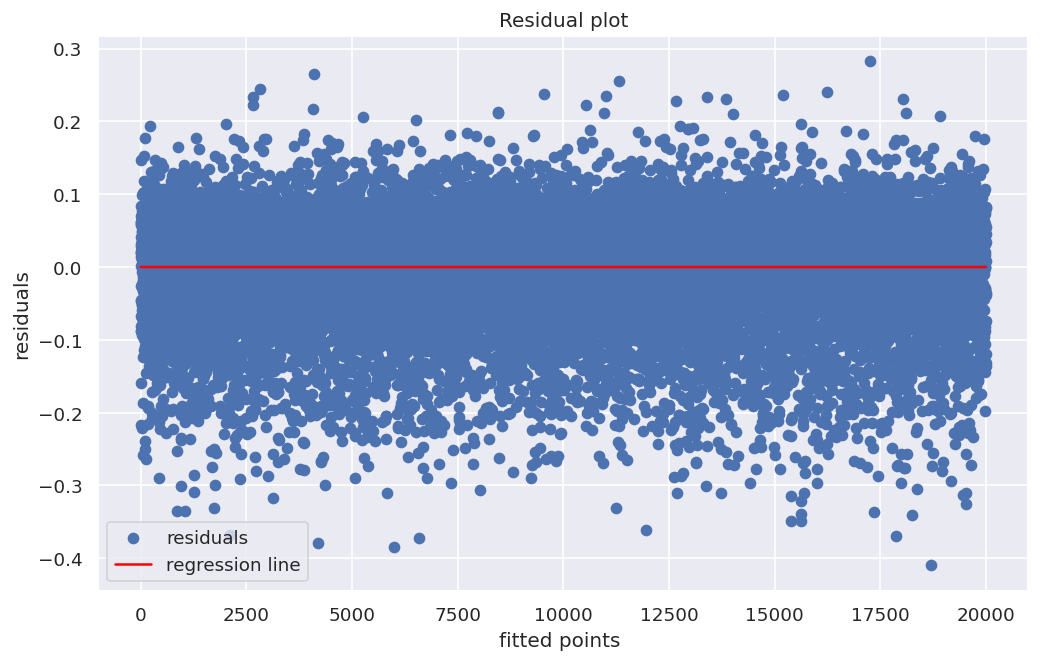

In [283]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

#### 2. Cross- Validation & Hyperparameter Tuning

In [284]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [285]:
lasso_regressor.score(X_train, y_train)

0.49558362398614964

In [286]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  0.4953005604159372


In [287]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

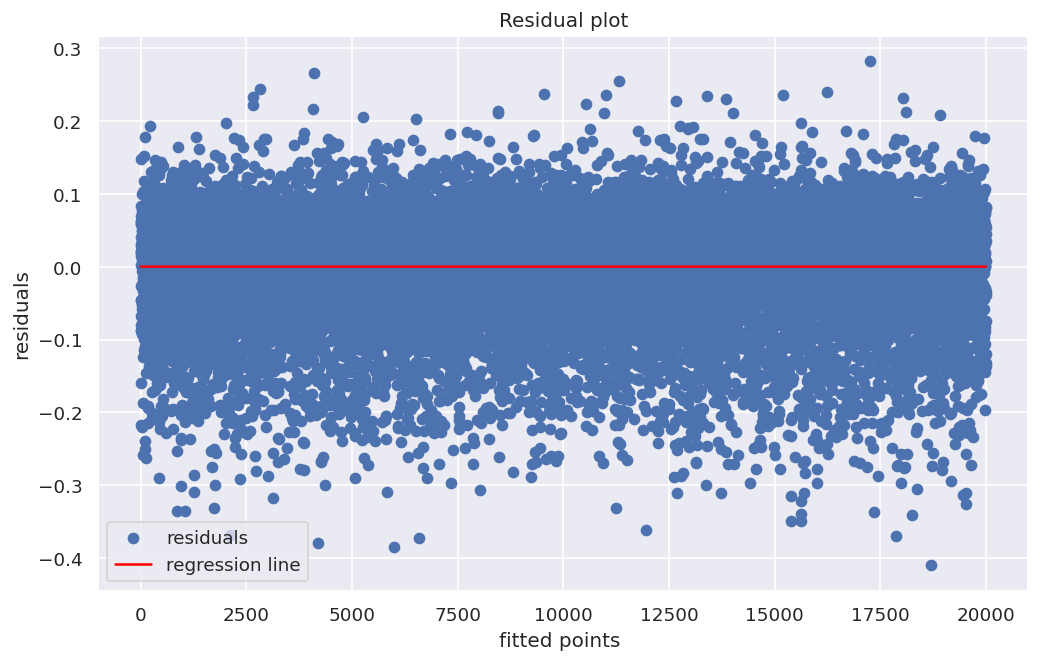

In [288]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

In [289]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [290]:
ridge_regressor.score(X_train, y_train)

0.4955826108688802

In [291]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  0.4953005604159372


In [292]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

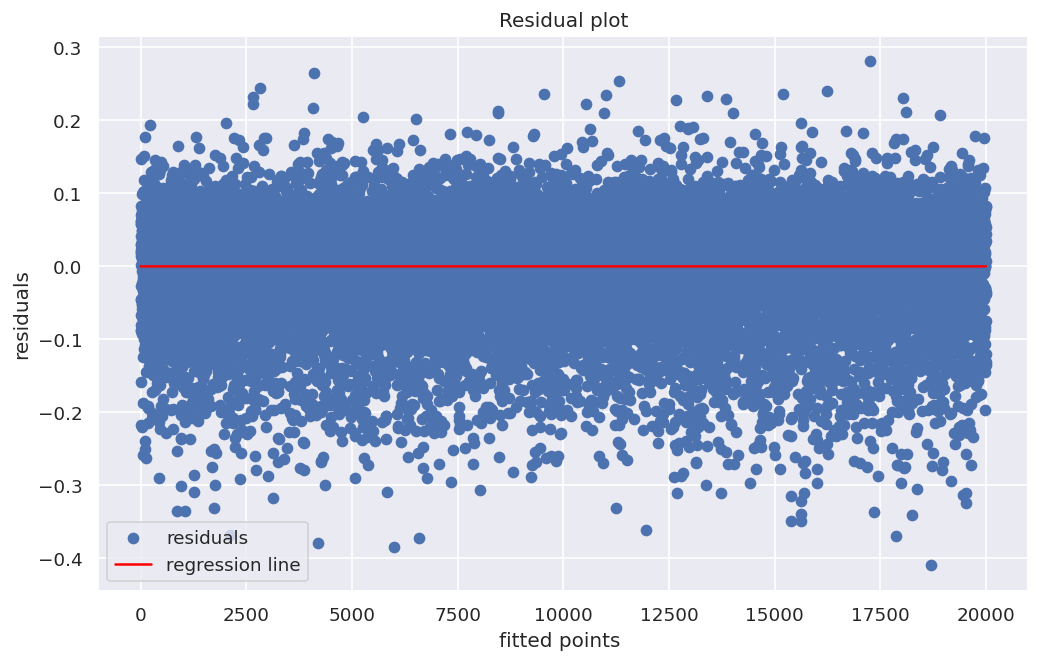

In [293]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a hyperparameter optimization technique that can be used in the context of the NYC Taxi Trip Time Prediction problem. It systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.
The reason for using GridSearchCV in this context is to optimize the parameters of the machine learning model used for prediction. The NYC Taxi Trip Time Prediction problem involves predicting the total ride duration of taxi trips in New York City.
model has several parameters that can be tuned for better performance.
By optimizing the model parameters with GridSearchCV, we can improve the model’s accuracy, leading to more precise taxi trip time predictions. This can have several business benefits, such as improved taxi dispatching efficiency and increased customer satisfaction due to more accurate estimated arrival times.

### ML Model - 2

### Light GBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
- Faster training speed and higher efficiency.

- Lower memory usage.

- Better accuracy.

- Support of parallel, distributed, and GPU learning.

- Capable of handling large-scale data.

In [294]:
from lightgbm import LGBMRegressor

In [295]:
# Applying LightGBM
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]
params={"n_estimator":n_estimator,"max_depth":max_depth,"min_samples_split":min_samples_split}
lgb=LGBMRegressor()
gs_lgb=GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1402
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 19
[LightGBM] [Info] Start training from score 0.182938
[LightGBM] [Warning] No further splits with positive 

In [296]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=9, min_samples_split=40, n_estimator=5)

In [297]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [298]:
y_preds_lgb = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train=gs_lgb_opt_model.predict(X_train)

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [299]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [300]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
5       dropoff_latitude                 528
8                   hour                 514
4      dropoff_longitude                 382
2       pickup_longitude                 377
6               distance                 360
3        pickup_latitude                 326
14          Day_Saturday                 119
15            Day_Sunday                 104
7                  month                  65
9                 minute                  56
13            Day_Monday                  50
0              vendor_id                  27
16          Day_Thursday                  24
12            Day_Friday                  23
17           Day_Tuesday                  19
1        passenger_count                  14
18         Day_Wednesday                  12
11  store_and_fwd_flag_Y                   0
10  store_and_fwd_flag_N                   0

<Axes: title={'center': 'Top 5 Features'}, xlabel='Feature', ylabel='Feature Importance'>

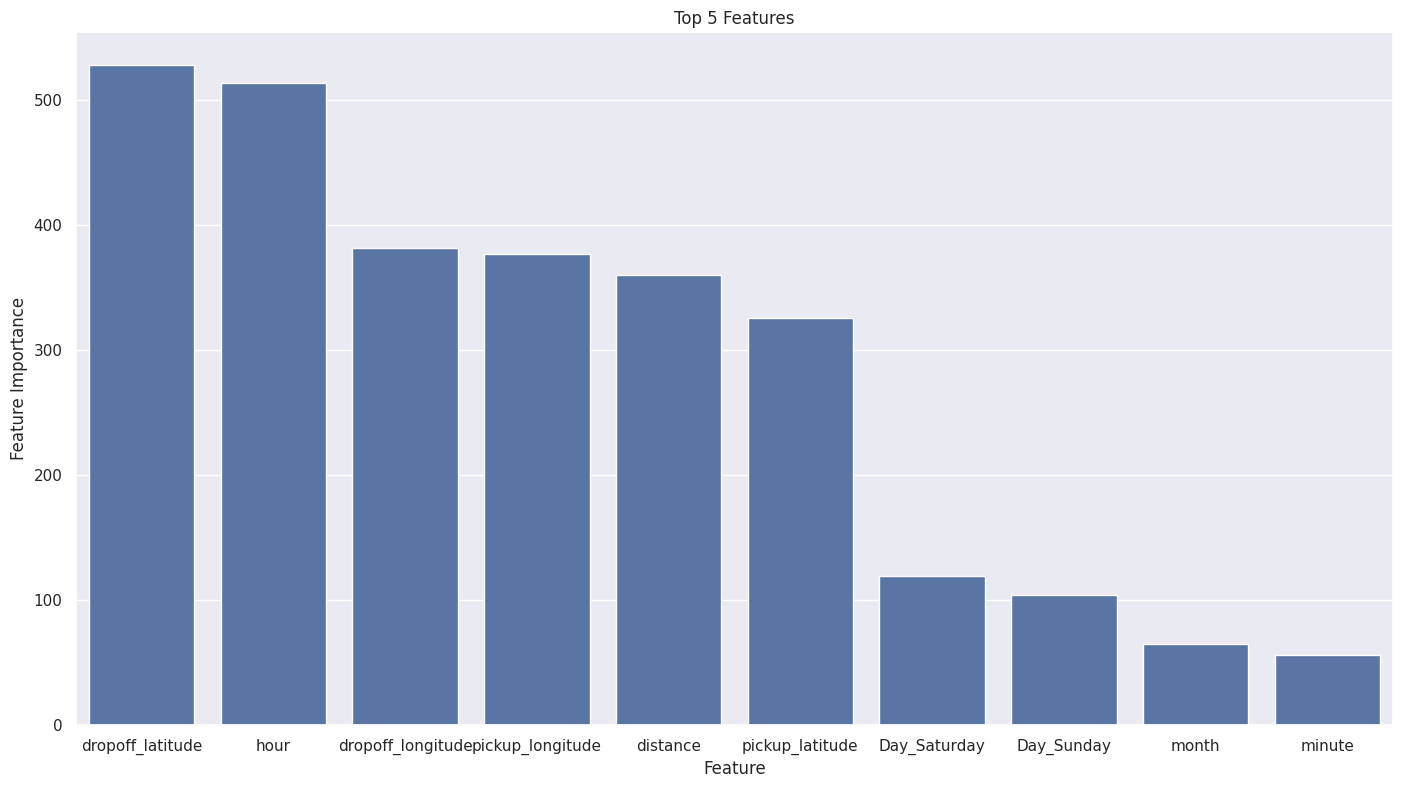

In [301]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

#### 1.Performance using Evaluation metric Score Chart.

MSE : 0.0033 RMSE : 0.05744562646538029
R2 : 0.7018087175911272 Adjusted R2 : 0.7017378794520204


(0.0033, 0.05744562646538029, 0.7018087175911272, 0.7017378794520204)

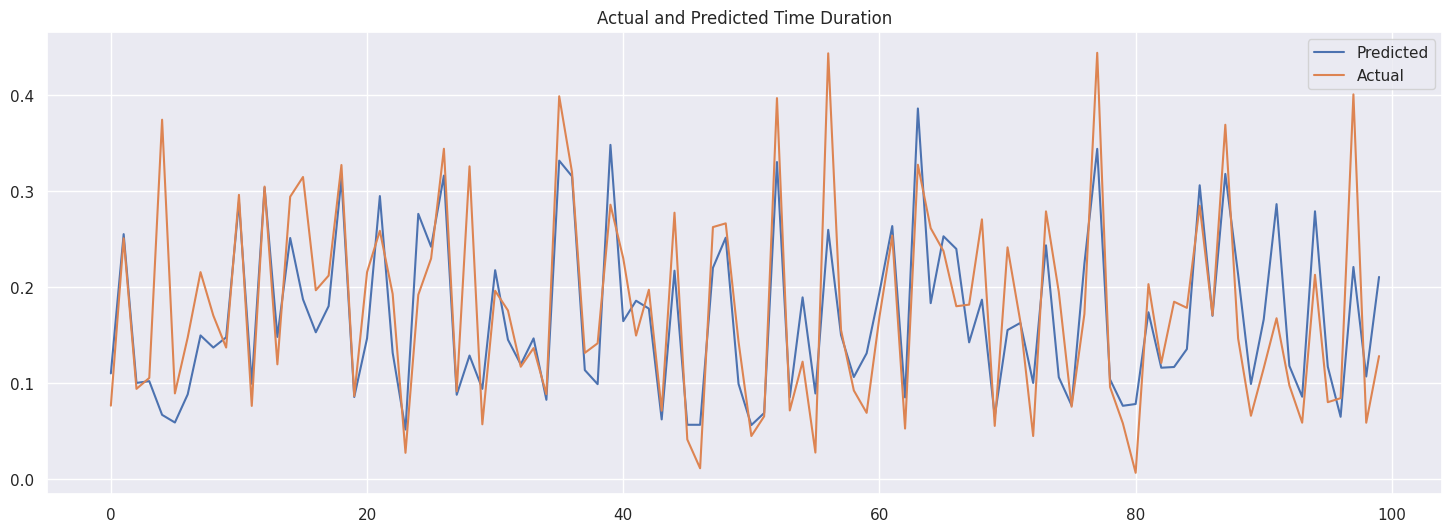

In [302]:
# Visualizing evaluation Metric Score chart
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 0.0035 RMSE : 0.05916079783099616
R2 : 0.6903418002396594 Adjusted R2 : 0.6900473304801276


(0.0035, 0.05916079783099616, 0.6903418002396594, 0.6900473304801276)

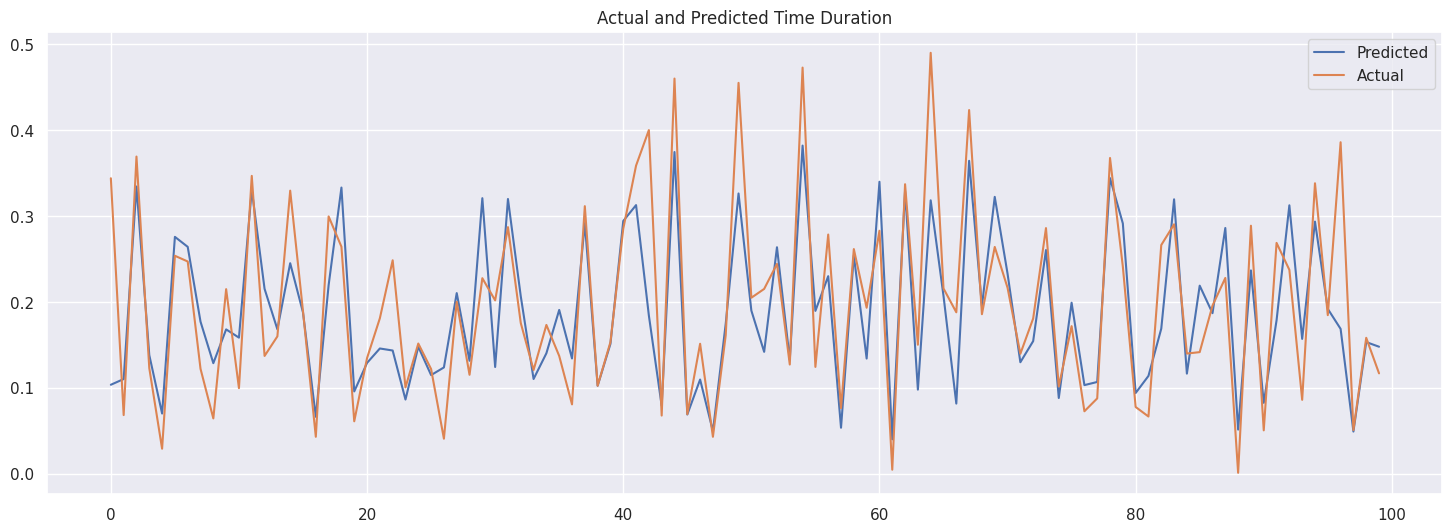

In [303]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual taxi trip durations. A lower MSE indicates a better fit of the model. In the context of NYC Taxi Trip Time Prediction, a model with a low MSE can lead to more accurate predictions of trip durations, which can improve taxi dispatching efficiency and customer satisfaction1.

* Root Mean Square Error (RMSE): RMSE is the square root of MSE. It measures the standard deviation of the residuals (prediction errors). A lower RMSE indicates a better fit of the model. In the NYC Taxi Trip Time Prediction context, a lower RMSE can mean more reliable predictions. For example, in predicting taxi trip times, a lower RMSE can lead to more accurate estimates, reducing waiting times for customers and improving the efficiency of taxi dispatching1.

* R-squared (R^2): R^2 measures the proportion of the variance in the taxi trip durations that is predictable from the input variables. A higher R^2 indicates a better fit of the model. In the NYC Taxi Trip Time Prediction context, a higher R^2 can indicate a model that explains a large proportion of the variance in taxi trip times, leading to more accurate predictions and better taxi dispatching decisions1.

* Adjusted R-squared: Adjusted R^2 is a modification of R^2 that adjusts for the number of predictors in the model. It only increases if the new variable improves the model more than would be expected by chance. In the NYC Taxi Trip Time Prediction context, Adjusted R^2 can prevent overfitting by penalizing the model for adding non-significant variables. This leads to more reliable and generalizable models, improving the robustness of taxi trip time predictions

In [304]:
#Train data

from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.0055473742826857575', '0.07448069738318619', '0.4975386610902135','0.49741929668112017'])
train.add_row(['2','Lasso Regression','0.005544777800761673','0.07446326477372364','0.4977738411443343','0.4976545326044711'])
train.add_row(['3','Ridge Regression ','0.0055447795071197434','0.07446327623144004','0.49777368658851806','0.4976543780119387'])
train.add_row(['7','LightGBM','0.0032980298940813377','0.057428476334318135','0.7012762377478683','0.7012052731131748'])
print(train)

+-------+-------------------+-----------------------+----------------------+---------------------+---------------------+
| SL NO |     MODEL_NAME    |       Train MSE       |      Train RMSE      |      Train R^2      |  Train Adjusted R^2 |
+-------+-------------------+-----------------------+----------------------+---------------------+---------------------+
|   1   | Linear Regression | 0.0055473742826857575 | 0.07448069738318619  |  0.4975386610902135 | 0.49741929668112017 |
|   2   |  Lasso Regression |  0.005544777800761673 | 0.07446326477372364  |  0.4977738411443343 |  0.4976545326044711 |
|   3   | Ridge Regression  | 0.0055447795071197434 | 0.07446327623144004  | 0.49777368658851806 |  0.4976543780119387 |
|   7   |      LightGBM     | 0.0032980298940813377 | 0.057428476334318135 |  0.7012762377478683 |  0.7012052731131748 |
+-------+-------------------+-----------------------+----------------------+---------------------+---------------------+


In [305]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.005472765706091576','0.07397814343501448','0.4957919161505717','0.495312438993758'])
test.add_row(['2','Lasso Regression','0.0054708980396948005','0.07396551926198315','0.49596398499944283','0.49548467147166453'])
test.add_row(['3','Ridge Regression ','0.005470874962507452','0.07396536326218815','0.49596611110990296','0.4954867996039515'])

test.add_row(['7','LightGBM','0.003418832582409957',' 0.058470784007142895','0.6850215927460219','0.6847220637301148'])
print(test)

+-------+-------------------+-----------------------+-----------------------+---------------------+---------------------+
| SL NO |     MODEL_NAME    |        Test MSE       |       Test RMSE       |       Test R^2      |  Test Adjusted R^2  |
+-------+-------------------+-----------------------+-----------------------+---------------------+---------------------+
|   1   | Linear Regression |  0.005472765706091576 |  0.07397814343501448  |  0.4957919161505717 |  0.495312438993758  |
|   2   |  Lasso Regression | 0.0054708980396948005 |  0.07396551926198315  | 0.49596398499944283 | 0.49548467147166453 |
|   3   | Ridge Regression  |  0.005470874962507452 |  0.07396536326218815  | 0.49596611110990296 |  0.4954867996039515 |
|   7   |      LightGBM     |  0.003418832582409957 |  0.058470784007142895 |  0.6850215927460219 |  0.6847220637301148 |
+-------+-------------------+-----------------------+-----------------------+---------------------+---------------------+


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R2 score, a measure of model accuracy, aids in effective decision-making and risk reduction in businesses, leading to increased efficiency and potential cost savings.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

LightGBM perform well ,because of it's low MSE,RMSE and higher R2 and adjusted R2 score.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

LightGBM.feature_importances_ provides a measure of the significance of each feature in the model’s prediction process. It quantifies the number of times a feature is used to split the data across all trees in the model, helping to identify which features are most often involved in the decision-making process

# **Conclusion**



*   LightGBM perform well ,because of it's low MSE,RMSE and higher R2 and adjusted R2 score.

*   LightGBM training prediction curve on the other hand starts quite low and further improves with the increase in the training size and it too plateau towards the end.
*   Validation curve seems to show similar trend in both the models i.e. starts very high but improves with the training size with some differences in error rate i.e. LightGBM curve learning is quite fast and more accurate as compared to the other.

*   Both the models seems to suffer from high variance since the training curve error is very less in both the models.




*   The large gap at the end also indicates that the model suffers from quite a low bias i.e. overfitting the training data.


*  Also, both the model's still has potential to decrease and converge towards the training curve by the end.


For improvement of our model
* Increase the regularization for the learning algorithm. This should decrease the variance and increase the bias towards the validation curve.
* Reduce the numbers of features in the training data that we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***